# **Task 2: Data Insights**

**Targeting high value customers based on customer demographics and attributes.**

---

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime as dt

plt.style.use('ggplot')

In [2]:
xls_file = pd.ExcelFile(r'C:\Users\user\OneDrive\Máy tính\Personal Project\KPMG\Task 2 - Data Insights\KPMG_VI_New_raw_data_update_final (1).xlsx')
sheet_names = xls_file.sheet_names[1:]
sheet_to_df = {}
for sheet_name in sheet_names:
    sheet_to_df[sheet_name] = xls_file.parse(sheet_name, skiprows=1)

dfs = []
for sheet_name, df in sheet_to_df.items():
    globals()[sheet_name] = df
    dfs.append(df)

In [3]:
sheet_to_df.keys()

dict_keys(['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress'])

## **Exploring Transactions Dataset**

### **- Understanding the big picture**

**Column Description**

There are 20000 rows and 13 columns in `Transactions` dataset

- `transaction_id`: dtype: int - context: ID of transaction
- `product_id`: dtype: int - context: ID of product
- `customer_id`: dtype: int - context: ID of customer
- `transaction_date`: dtype: datetime - context: Date of transaction
- `online_order`: dtype: category (binary) - context: Whether the customer orders product online or not
- `order_status`: dtype: category - context: Is the order approved or cancelled?
- `brand`: dtype: category - context: Brand of product
- `product_line`: dtype: category - context: What the product line does the product belong to?
- `product_class`: dtype: category - context: Class of product
- `product_size`: dtype: category - context: Size of product
- `list_price`: dtype: float - context: Listed price of the product
- `standard_cost`: dtype: float - context: Cost price
- `product_first_sold_date`: dtype: datetime - context: The product was sold for the first time on

In [4]:
Transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
Transactions.shape

(20000, 13)

In [6]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
Transactions.describe(include='all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,NaN,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,NaN,NaN,NaN,NaN,NaN,2091.470000,1759.850000,42710.000000


### **- Preparation (Clean Data)**

In [8]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [9]:
# Checking Null value
Transactions.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [10]:
# Checking duplicated values
Transactions.duplicated().sum()

0

In [11]:
# product_first_sold_date column
# Convert excel date to real date
Transactions['product_first_sold_date'] = pd.TimedeltaIndex(Transactions['product_first_sold_date'], unit='D') + pd.Timestamp(1899, 12, 30)

In [12]:
Transactions['online_order'].value_counts(dropna=False)

online_order
1.0    9829
0.0    9811
NaN     360
Name: count, dtype: int64

In [13]:
Transactions['online_order'] = Transactions['online_order'].fillna(method='ffill')

In [14]:
Transactions.loc[Transactions['brand'].isna(),:]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaT
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaT
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaT
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaT


In [15]:
Transactions.dropna(inplace=True)
Transactions.reset_index(drop=True)
#Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19799,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10
19800,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20
19801,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-17


In [16]:
#sorting transactions df in ascending order of the DATE column
Transactions = Transactions.sort_values(by='transaction_date').reset_index(drop=True)
Transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1293,67,1931,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
1,3525,50,3490,2017-01-01,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,2002-03-22
2,12544,36,3062,2017-01-01,0.0,Approved,Solex,Standard,low,medium,945.04,507.58,1995-12-19
3,12485,85,2805,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,2000-05-22
4,3518,58,523,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,912.52,141.40,2015-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19798,748,80,2865,2017-12-30,1.0,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18
19799,19959,4,1787,2017-12-30,0.0,Approved,Solex,Standard,medium,medium,1483.20,99.59,2005-10-22
19800,7518,65,3433,2017-12-30,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,2015-05-21
19801,15190,1,362,2017-12-30,1.0,Approved,Giant Bicycles,Touring,medium,large,1873.97,863.95,2003-09-09


In [17]:
#Now that we have the pandas.DataFrame sorted according to the date,
#we can analyse the dataset with regards to the change over time.
#However, before we can do that, we need to make sure that the DATE column contains no missing values for unrecorded dates.

#checking for any missing date in the DATE column
pd.date_range(start="2017-01-01", end="2017-12-30").difference(Transactions['transaction_date'])

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

=> No missing date in `transaction_date` column

### **- Study of ralationship between variables**

*Univariate Analysis*

In [18]:
onl_order = Transactions['online_order'].value_counts().reset_index()
onl_order

,online_order,count
0,1.0,9925
1,0.0,9878


In [19]:
order_status = Transactions['order_status'].value_counts(normalize=True).reset_index()
order_status

,order_status,proportion
0,Approved,0.991011
1,Cancelled,0.008989


In [20]:
brand = Transactions['brand'].value_counts().reset_index()
brand

,brand,count
0,Solex,4253
1,Giant Bicycles,3312
2,WeareA2B,3295
3,OHM Cycles,3043
4,Trek Bicycles,2990
5,Norco Bicycles,2910


In [21]:
prod_line = Transactions['product_line'].value_counts().reset_index()
prod_line

,product_line,count
0,Standard,14176
1,Road,3970
2,Touring,1234
3,Mountain,423


In [22]:
prod_class = Transactions['product_class'].value_counts().reset_index()
prod_class

,product_class,count
0,medium,13826
1,high,3013
2,low,2964


In [23]:
prod_size = Transactions['product_size'].value_counts().reset_index()
prod_size

,product_size,count
0,medium,12990
1,large,3976
2,small,2837


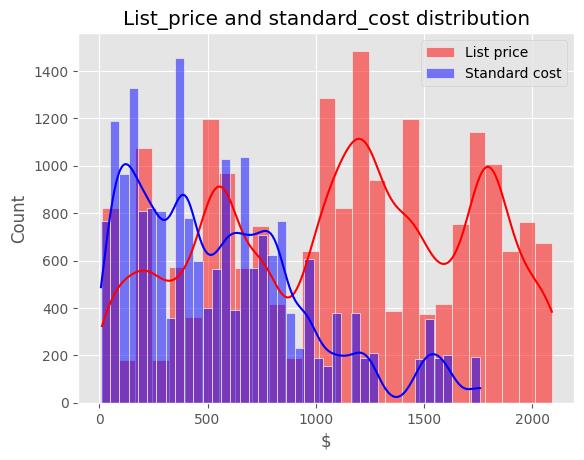

In [24]:
sns.histplot(data=Transactions, x='list_price',kde=True, color='red', label='List price')
sns.histplot(data=Transactions, x='standard_cost',kde=True,color='blue', label='Standard cost')
plt.title('List_price and standard_cost distribution')
plt.xlabel('$')
plt.legend()

*Inights after Univariate Analysis*

- Half of the transactions come from the online sales channel.
- There is a small percentage (0.9%) of transactions that have been canceled.
- Brands with the most transactions is Solex.
- Standard product line has the most transactions.
- The product class with the most transactions is medium.
- The product size with the most transactions is medium.
- List price của các sản phẩm tập trung nhiều nhất ở $510, $1150 và $1600

*Bivariate Analysis*

In [25]:
# Assume that list_price is total_sale of each transaction
sales = Transactions[Transactions['order_status']=='Approved']
date_sales = sales.groupby('transaction_date')['list_price'].sum().reset_index()
date_sales.rename(columns={'list_price':'total_sales'},inplace=True)
date_sales

,transaction_date,total_sales
0,2017-01-01,57271.32
1,2017-01-02,57765.79
2,2017-01-03,60563.34
3,2017-01-04,66620.61
4,2017-01-05,73128.66
...,...,...
359,2017-12-26,56262.98
360,2017-12-27,53454.09
361,2017-12-28,66235.33
362,2017-12-29,55095.14


Text(0.5, 1.0, 'Total Sales for Entire Fiscal Year (1st January 2017 to 30th December 2017)')

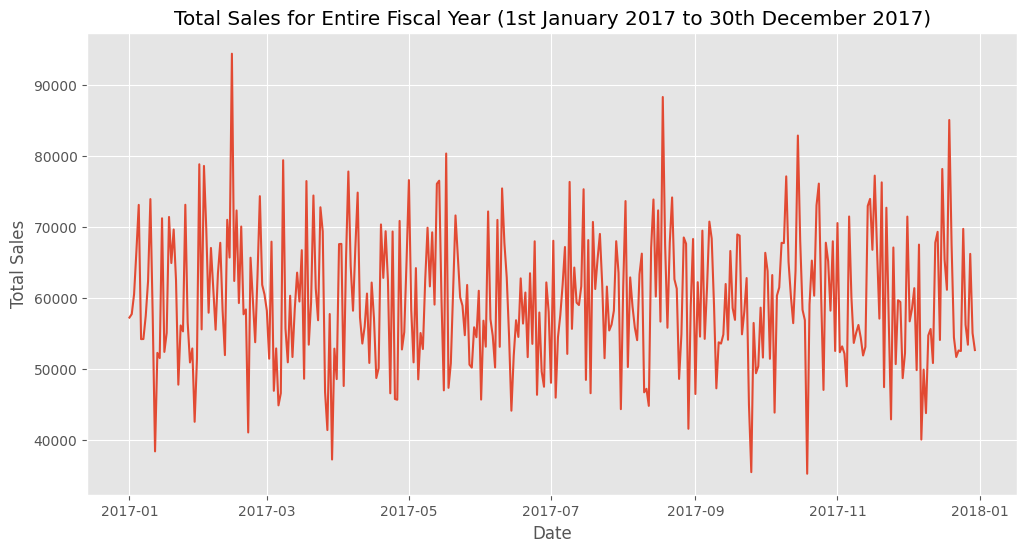

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(date_sales['transaction_date'], date_sales['total_sales'])
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
ax.set_title('Total Sales for Entire Fiscal Year (1st January 2017 to 30th December 2017)')

In [27]:
# brand and sales
brand_sales = sales.groupby('brand')['list_price'].sum().reset_index().rename(columns={'list_price':'tot_sales'})\
              .sort_values(by='tot_sales',ascending=False)
brand_sales = brand_sales.reset_index(drop=True)
brand_sales

,brand,tot_sales
0,Solex,4446888.35
1,WeareA2B,4126372.83
2,Giant Bicycles,4055613.05
3,Trek Bicycles,3512223.81
4,OHM Cycles,2965459.80
5,Norco Bicycles,2632937.45


In [28]:
sales['yearmonth'] = sales['transaction_date'].apply(lambda x: x.year*100 + x.month)

C:\Users\user\AppData\Local\Temp\ipykernel_11348\4063475313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['yearmonth'] = sales['transaction_date'].apply(lambda x: x.year*100 + x.month)


Text(0.5, 1.0, 'Total_sales by Yearmonth and Brand')

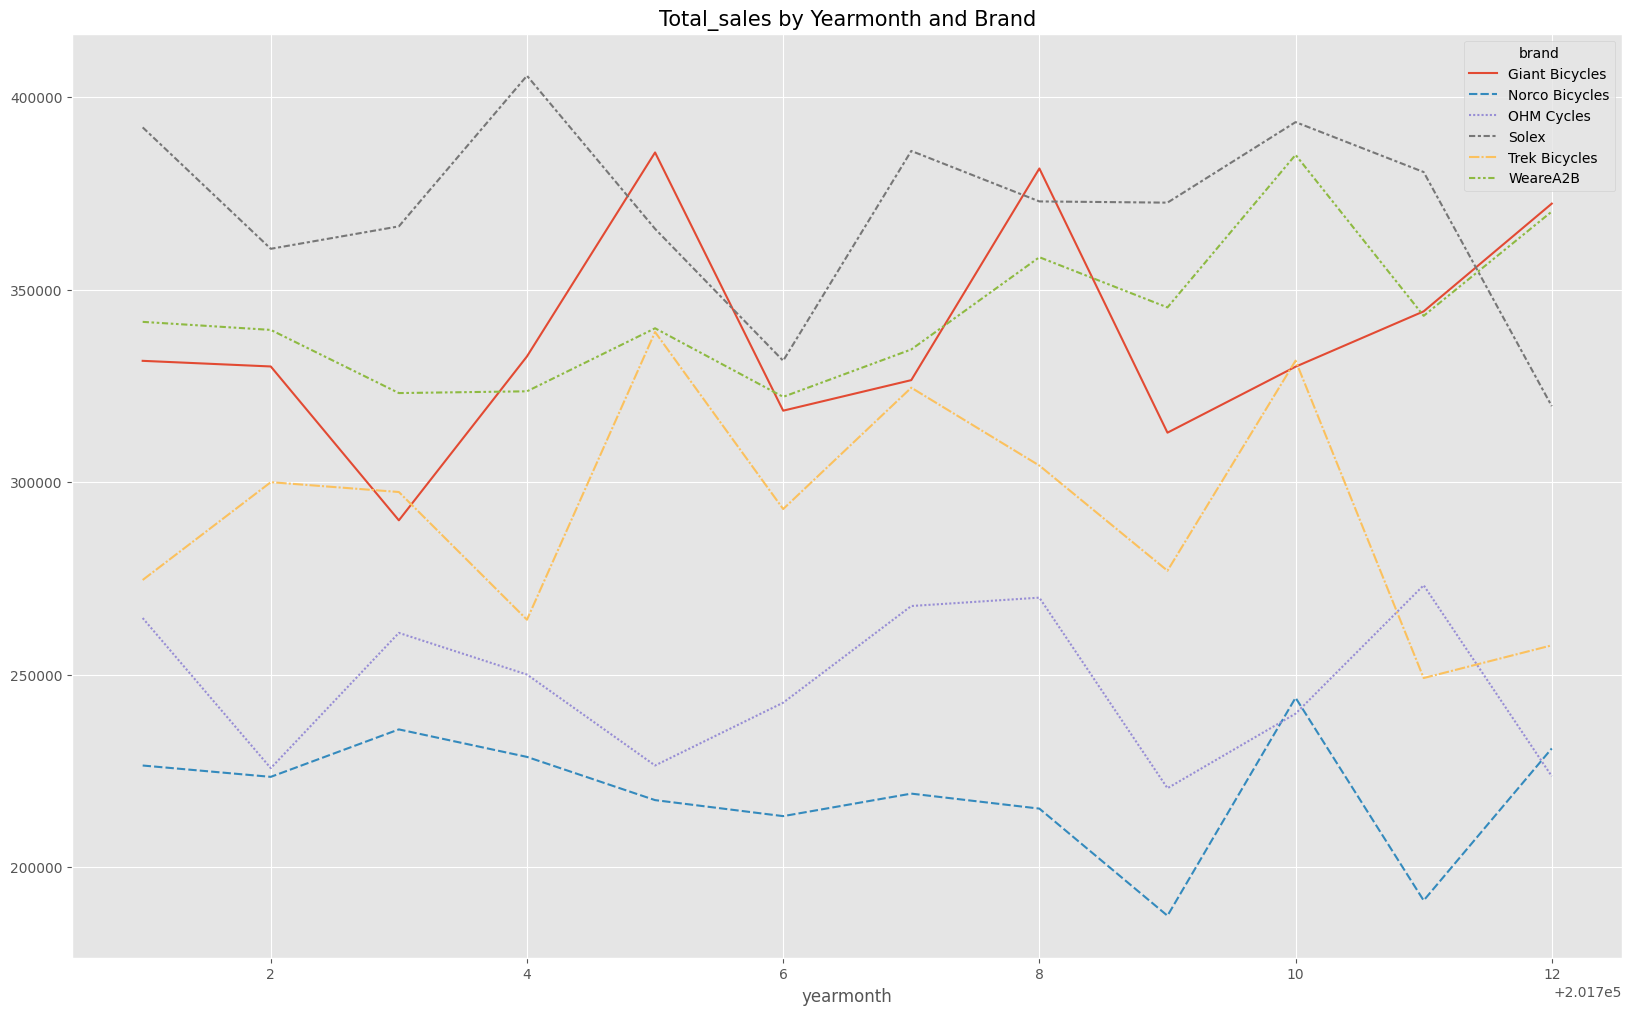

In [29]:
b = sales.groupby(['yearmonth','brand'])['list_price'].sum().unstack(level=1)
plt.subplots(figsize=(20,12))
sns.lineplot(data=b[['Giant Bicycles','Norco Bicycles','OHM Cycles','Solex','Trek Bicycles','WeareA2B']])
plt.title('Total_sales by Yearmonth and Brand', fontsize=15)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Norco Bicycles'),
  Text(1, 0, 'Giant Bicycles'),
  Text(2, 0, 'Solex'),
  Text(3, 0, 'WeareA2B'),
  Text(4, 0, 'OHM Cycles'),
  Text(5, 0, 'Trek Bicycles')])

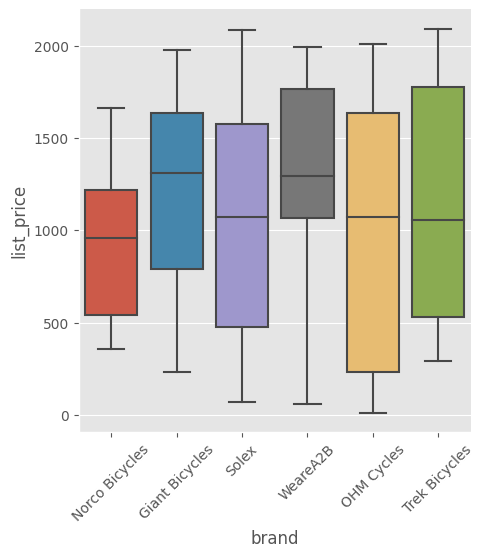

In [30]:
sns.catplot(data=sales, x='brand', y='list_price',kind='box')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Norco Bicycles'),
  Text(1, 0, 'Giant Bicycles'),
  Text(2, 0, 'Solex'),
  Text(3, 0, 'WeareA2B'),
  Text(4, 0, 'OHM Cycles'),
  Text(5, 0, 'Trek Bicycles')])

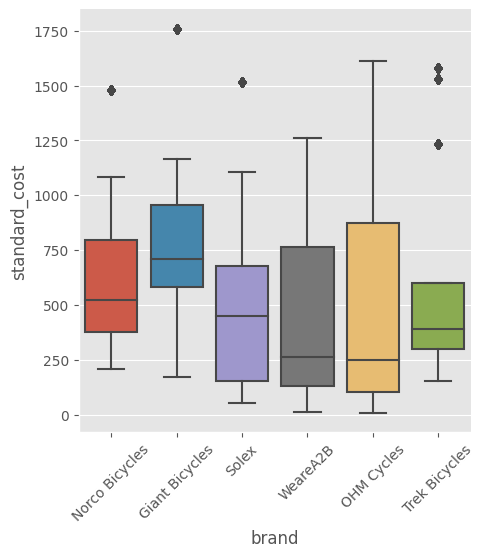

In [31]:
sns.catplot(data=sales, x='brand', y='standard_cost',kind='box')
plt.xticks(rotation=45)

In [32]:
# brand and order_status
brand_order = Transactions[['transaction_id','brand','order_status']]
brand_order = brand_order.groupby(['brand','order_status'])['transaction_id'].count().unstack(level=1)
brand_order_pct = (brand_order.div(brand_order.sum(axis=1),axis=0)*100).sort_values(by='Cancelled', ascending=False)
brand_order_pct

order_status,Approved,Cancelled
brand,,
Solex,99.012462,0.987538
WeareA2B,99.089530,0.910470
OHM Cycles,99.112718,0.887282
Giant Bicycles,99.124396,0.875604
Norco Bicycles,99.140893,0.859107
Trek Bicycles,99.163880,0.836120


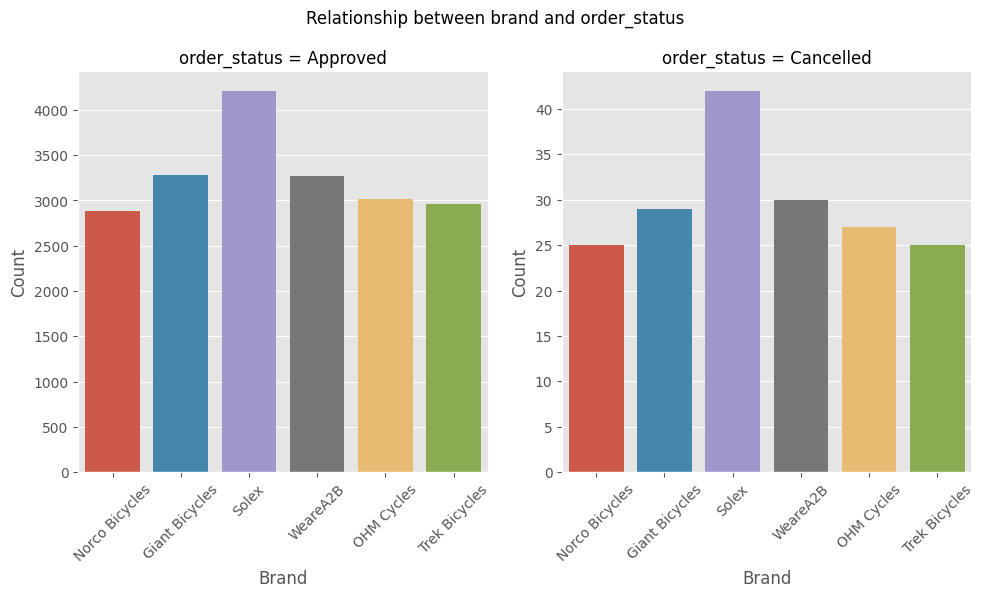

In [33]:
g = sns.catplot(data=Transactions, x='brand', col='order_status', kind='count',sharey=False)
g.fig.suptitle('Relationship between brand and order_status', y=1.05)
g.set(ylabel='Count', xlabel='Brand')
g.set_xticklabels(rotation=45)

In [34]:
# product_line and order_status
prodLine_order = Transactions[['transaction_id','product_line','order_status']]
prodLine_order = prodLine_order.groupby(['product_line','order_status'])['transaction_id'].count().unstack(level=1)
prodLine_order_pct = (prodLine_order.div(prodLine_order.sum(axis=1),axis=0)*100).sort_values(by='Cancelled',ascending=False)
prodLine_order_pct

order_status,Approved,Cancelled
product_line,,
Road,99.042821,0.957179
Standard,99.097065,0.902935
Touring,99.270665,0.729335
Mountain,99.290780,0.709220


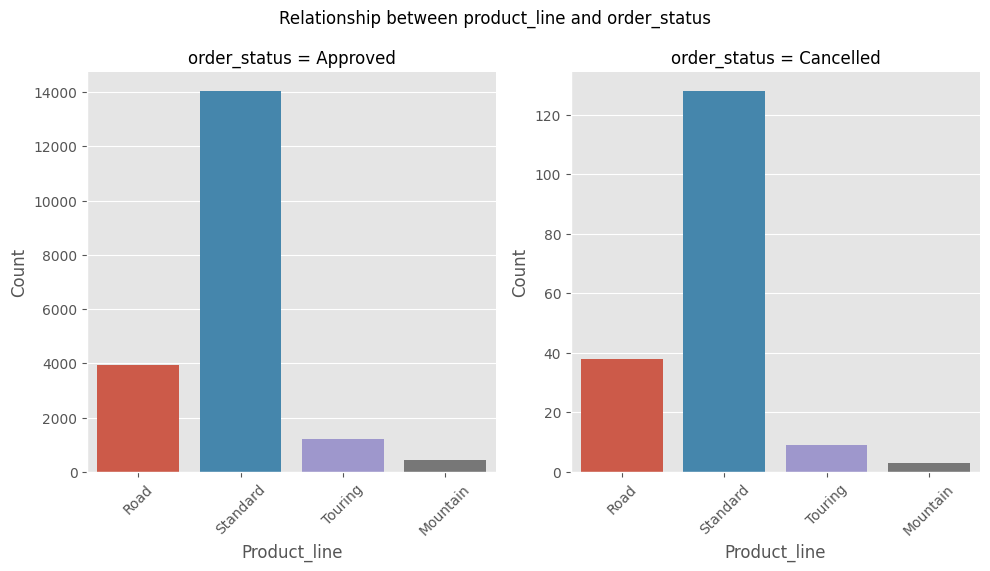

In [35]:
g = sns.catplot(data=Transactions, x='product_line', col='order_status', kind='count',sharey=False)
g.fig.suptitle('Relationship between product_line and order_status', y=1.05)
g.set(ylabel='Count', xlabel='Product_line')
g.set_xticklabels(rotation=45)

In [36]:
# product_class and order_status
class_order = Transactions[['transaction_id','product_class','order_status']]
class_order = class_order.groupby(['product_class','order_status'])['transaction_id'].count().unstack(level=1)
class_order_pct = (class_order.div(class_order.sum(axis=1),axis=0)*100).sort_values(by='Cancelled',ascending=False)
class_order_pct

order_status,Approved,Cancelled
product_class,,
high,98.838367,1.161633
medium,99.095906,0.904094
low,99.392713,0.607287


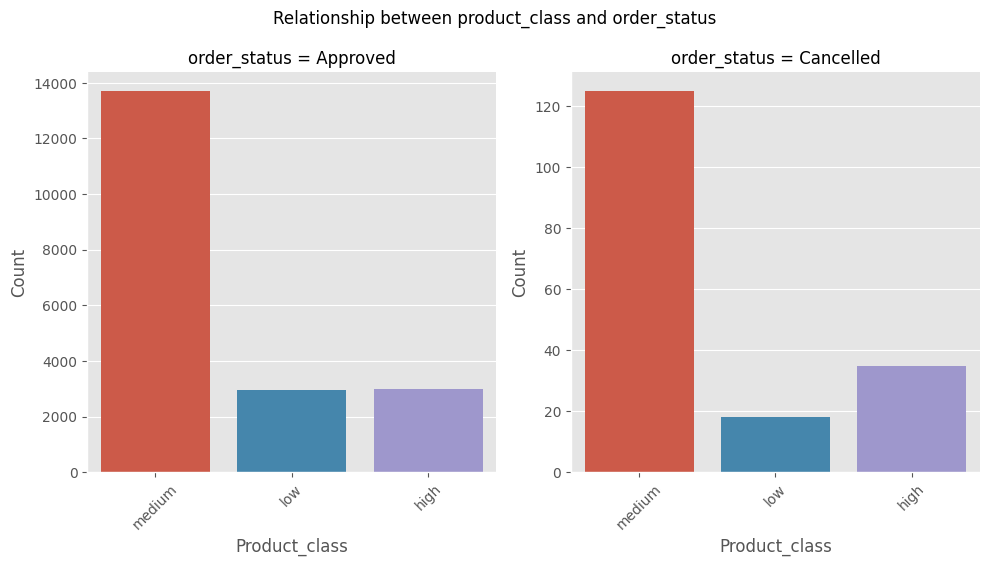

In [37]:
g = sns.catplot(data=Transactions, x='product_class', col='order_status', kind='count',sharey=False)
g.fig.suptitle('Relationship between product_class and order_status', y=1.05)
g.set(ylabel='Count', xlabel='Product_class')
g.set_xticklabels(rotation=45)

In [38]:
# product_size and order_status
size_order = Transactions[['transaction_id','product_size','order_status']]
size_order = size_order.groupby(['product_size','order_status'])['transaction_id'].count().unstack(level=1)
size_order_pct = (size_order.div(size_order.sum(axis=1),axis=0)*100).sort_values(by='Cancelled',ascending=False)
size_order_pct

order_status,Approved,Cancelled
product_size,,
large,99.044266,0.955734
small,99.083539,0.916461
medium,99.122402,0.877598


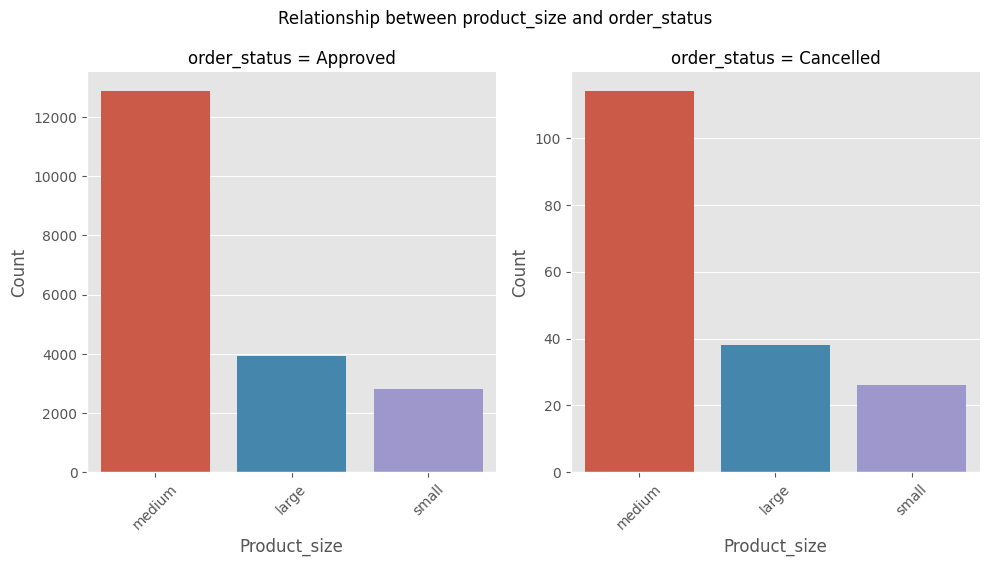

In [39]:
g = sns.catplot(data=Transactions, x='product_size', col='order_status', kind='count',sharey=False)
g.fig.suptitle('Relationship between product_size and order_status', y=1.05)
g.set(ylabel='Count', xlabel='Product_size')
g.set_xticklabels(rotation=45)

In [40]:
a = Transactions[['transaction_id','product_line','order_status','brand']]
a = a.groupby(['brand','product_line','order_status'])['transaction_id'].count().unstack(level=2)
b = (a.div(a.sum(axis=1),axis=0)*100).sort_values(by='Cancelled',ascending=False)
b = b.rename(columns={'Approved':'Approved_pct (%)','Cancelled':'Cancelled_pct (%)'})
b

,order_status,Approved_pct (%),Cancelled_pct (%)
brand,product_line,,
Solex,Road,98.510242,1.489758
OHM Cycles,Road,98.844673,1.155327
Norco Bicycles,Road,98.916576,1.083424
Trek Bicycles,Standard,98.984199,1.015801
Norco Bicycles,Mountain,99.000000,1.000000
Solex,Touring,99.038462,0.961538
WeareA2B,Standard,99.047619,0.952381
Giant Bicycles,Standard,99.060298,0.939702
Solex,Standard,99.087799,0.912201


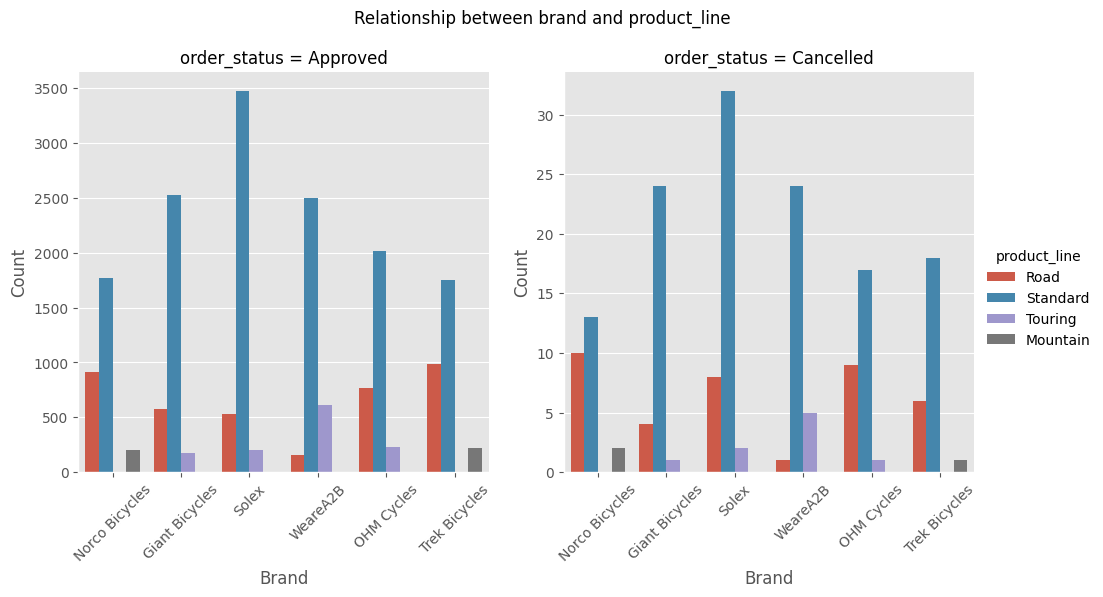

In [41]:
g = sns.catplot(data=Transactions, x='brand',hue='product_line', col='order_status', kind='count',sharey=False)
g.fig.suptitle('Relationship between brand and product_line', y=1.05)
g.set(ylabel='Count', xlabel='Brand')
g.set_xticklabels(rotation=45)

In [42]:
cols_group = ['brand','product_line','product_class','product_size','order_status']
groups_df = Transactions[['brand','product_line','product_class','product_size','order_status','transaction_id']]
groups_df = groups_df.groupby(cols_group)['transaction_id'].count().unstack(level=4).fillna(0)\
            .rename(columns={'Approved':'Approved (transactions)','Cancelled':'Cancelled (transactions)'})
groups_df_pct = (groups_df.div(groups_df.sum(axis=1),axis=0)*100)\
                .rename(columns={'Approved (transactions)':'Approved_pct','Cancelled (transactions)':'Cancelled_pct'})\
                .sort_values(by='Cancelled_pct',ascending=False)
groups_df_pct

order_status                                            Approved_pct   
brand          product_line product_class product_size                 
Trek Bicycles  Standard     high          medium           98.153846  \
Solex          Road         medium        large            98.360656   
                                          small            98.378378   
               Standard     high          medium           98.404255   
                                          large            98.421053   
Giant Bicycles Standard     medium        small            98.469388   
OHM Cycles     Road         medium        small            98.500000   
Norco Bicycles Road         medium        large            98.630137   
OHM Cycles     Road         medium        medium           98.697917   
WeareA2B       Standard     medium        small            98.740554   
Giant Bicycles Standard     high          medium           98.813559   
Solex          Road         medium        medium           98.816568   
Norco Bicycles Standard     medium        medium           98.831386   
WeareA2B       Touring      medium        large            98.837209   
               Standard     low           medium           98.850575   
Norco Bicycles Road         high          large            98.952880   
OHM Cycles     Standard     high          medium           98.958333   
Norco Bicycles Standard     high          medium           98.958333   
Trek Bicycles  Standard     low           medium           98.963731   
Giant Bicycles Standard     high          small            98.974359   
               Road         low           small            98.979592   
Norco Bicycles Mountain     low           small            99.000000   
Trek Bicycles  Standard     medium        medium           99.014778   
Norco Bicycles Road         medium        medium           99.025341   
Solex          Touring      medium        large            99.038462   
OHM Cycles     Standard     medium        medium           99.073216   
Giant Bicycles Standard     medium        large            99.090909   
Trek Bicycles  Road         medium        large            99.122807   
WeareA2B       Standard     medium        medium           99.127758   
Trek Bicycles  Standard     medium        small            99.206349   
Solex          Standard     medium        medium           99.208704   
                                          large            99.215686   
Trek Bicycles  Road         medium        medium           99.244332   
               Standard     medium        large            99.257058   
Solex          Standard     low           medium           99.268293   
WeareA2B       Road         low           small            99.363057   
Giant Bicycles Standard     medium        medium           99.377335   
               Touring      medium        large            99.441341   
Norco Bicycles Standard     medium        small            99.475066   
Giant Bicycles Road         medium        medium           99.477807   
OHM Cycles     Road         high          large            99.487179   
Trek Bicycles  Road         low           medium           99.502488   
Norco Bicycles Standard     low           medium           99.537037   
Trek Bicycles  Mountain     low           medium           99.551570   
OHM Cycles     Touring      low           medium           99.563319   
               Standard     low           medium           99.736842   
Trek Bicycles  Road         low           small           100.000000   
Norco Bicycles Standard     high          small           100.000000   
WeareA2B       Touring      medium        medium          100.000000   

order_status                                            Cancelled_pct  
brand          product_line product_class product_size                 
Trek Bicycles  Standard     high          medium             1.846154  
Solex          Road         medium        large              1.639344  
                                       

In [43]:
groups_df

order_status                                            Approved (transactions)   
brand          product_line product_class product_size                            
Giant Bicycles Road         low           small                           194.0  \
                            medium        medium                          381.0   
               Standard     high          medium                          583.0   
                                          small                           193.0   
                            medium        large                           763.0   
                                          medium                          798.0   
                                          small                           193.0   
               Touring      medium        large                           178.0   
Norco Bicycles Mountain     low           small                           198.0   
               Road         high          large                           189.0   
                            medium        large                           216.0   
                                          medium                          508.0   
               Standard     high          medium                          190.0   
                                          small                           183.0   
                            low           medium                          430.0   
                            medium        medium                          592.0   
                                          small                           379.0   
OHM Cycles     Road         high          large                           194.0   
                            medium        medium                          379.0   
                                          small                           197.0   
               Standard     high          medium                          570.0   
                            low           medium                          379.0   
                            medium        medium                         1069.0   
               Touring      low           medium                          228.0   
Solex          Road         medium        large                           180.0   
                                          medium                          167.0   
                                          small                           182.0   
               Standard     high          large                           187.0   
                                          medium                          370.0   
                            low           medium                          407.0   
                            medium        large                           506.0   
                                          medium                         2006.0   
               Touring      medium        large                           206.0   
Trek Bicycles  Mountain     low           medium                          222.0   
               Road         low           medium                          200.0   
                                          small                           169.0   
                            medium        large                           226.0   
                                          medium                          394.0   
               Standard     high          medium                          319.0   
                            low           medium                          191.0   
                            medium        large                           668.0   
                                          medium                          201.0   
                                          small                           375.0   
WeareA2B       Road         low           small                           156.0   
               Standard     low           medium                          172.0   
                            medium        medium                         1932.0   
                

In [44]:
cols_group = ['brand','product_line','product_class','product_size','order_status']
groups_df = Transactions[['brand','product_line','product_class','product_size','order_status','list_price']]
groups_df = groups_df.groupby(cols_group)['list_price'].sum().unstack(level=4).fillna(0)\
            .rename(columns={'Approved':'Approved (tot_sales)','Cancelled':'Cancelled (tot_sales)'})
groups_df_pct = (groups_df.div(groups_df.sum(axis=1),axis=0)*100)\
                .rename(columns={'Approved (tot_sales)':'Approved_pct','Cancelled (tot_sales)':'Cancelled_pct'})\
                .sort_values('Cancelled_pct',ascending=False)
groups_df_pct

order_status                                            Approved_pct   
brand          product_line product_class product_size                 
Trek Bicycles  Standard     high          medium           98.095417  \
Solex          Standard     high          medium           98.324079   
               Road         medium        large            98.360656   
                                          small            98.378378   
               Standard     high          large            98.421053   
Norco Bicycles Standard     medium        medium           98.423086   
Giant Bicycles Standard     medium        small            98.469388   
OHM Cycles     Road         medium        small            98.500000   
WeareA2B       Standard     medium        small            98.601962   
Norco Bicycles Road         medium        large            98.630137   
Giant Bicycles Standard     high          medium           98.796055   
Solex          Road         medium        medium           98.816568   
WeareA2B       Standard     low           medium           98.850575   
OHM Cycles     Standard     high          medium           98.850913   
WeareA2B       Touring      medium        large            98.889974   
OHM Cycles     Road         medium        medium           98.907115   
Norco Bicycles Road         high          large            98.952880   
               Standard     high          medium           98.958333   
Trek Bicycles  Standard     low           medium           98.963731   
Giant Bicycles Standard     high          small            98.974359   
               Road         low           small            98.979592   
Norco Bicycles Mountain     low           small            99.000000   
Giant Bicycles Standard     medium        large            99.012333   
Trek Bicycles  Standard     medium        medium           99.014778   
Solex          Standard     medium        large            99.023473   
               Touring      medium        large            99.038462   
Trek Bicycles  Road         medium        large            99.122807   
Solex          Standard     low           medium           99.141838   
WeareA2B       Standard     medium        medium           99.146848   
Solex          Standard     medium        medium           99.158375   
Trek Bicycles  Standard     medium        small            99.174350   
OHM Cycles     Standard     medium        medium           99.177357   
Norco Bicycles Road         medium        medium           99.188681   
Trek Bicycles  Road         medium        medium           99.192281   
               Standard     medium        large            99.230520   
WeareA2B       Road         low           small            99.363057   
Giant Bicycles Touring      medium        large            99.441341   
               Standard     medium        medium           99.464525   
Norco Bicycles Standard     medium        small            99.474584   
OHM Cycles     Road         high          large            99.487179   
Trek Bicycles  Road         low           medium           99.502488   
Norco Bicycles Standard     low           medium           99.532156   
Trek Bicycles  Mountain     low           medium           99.551570   
OHM Cycles     Standard     low           medium           99.552508   
               Touring      low           medium           99.563319   
Giant Bicycles Road         medium        medium           99.635442   
Trek Bicycles  Road         low           small           100.000000   
Norco Bicycles Standard     high          small           100.000000   
WeareA2B       Touring      medium        medium          100.000000   

order_status                                            Cancelled_pct  
brand          product_line product_class product_size                 
Trek Bicycles  Standard     high          medium             1.904583  
Solex          Standard     high          medium             1.675921  
               Road         medium     

In [45]:
groups_df.sort_values('Approved (tot_sales)',ascending=False)

,,,order_status,Approved (tot_sales),Cancelled (tot_sales)
brand,product_line,product_class,product_size,,
WeareA2B,Standard,medium,medium,2531898.24,21786.82
Solex,Standard,medium,medium,1765452.65,14984.61
Trek Bicycles,Standard,medium,large,1268341.75,9835.32
Giant Bicycles,Standard,medium,large,1120150.47,11173.71
OHM Cycles,Standard,medium,medium,884349.60,7335.38
Giant Bicycles,Standard,medium,medium,726565.69,3911.52
WeareA2B,Touring,medium,large,701100.15,7869.75
OHM Cycles,Standard,high,medium,693901.60,8066.22
Giant Bicycles,Standard,high,medium,692674.65,8441.05


*Inights after Bivariate Analysis*

- In 2017, revenue tends to be flat (no change in revenue).
- The Solex brand contributes the largest amount of sales and has the largest canceled transaction rate of all brands, but this rate is not high (nearly 1%). WeareA2B brand has the 2nd highest sales and sales are trending up.
- Products with the Solex brand, belonging to the Standard product line, medium product class and medium product size contributed the largest sales to the Solex brand.
- Of all the products, the product is branded WeareA2B, which belongs to the standard product line, medium product class and medium procduct size has the largest total sales.

In [157]:
Transactions.to_csv('transaction.csv',index=False)

### **- RFM analysis**

In [46]:
approved = Transactions[Transactions['order_status']=='Approved']
approved = approved.reset_index(drop=True)
approved

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1293,67,1931,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
1,3525,50,3490,2017-01-01,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,2002-03-22
2,12544,36,3062,2017-01-01,0.0,Approved,Solex,Standard,low,medium,945.04,507.58,1995-12-19
3,12485,85,2805,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,2000-05-22
4,3518,58,523,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,912.52,141.40,2015-05-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19620,748,80,2865,2017-12-30,1.0,Approved,Trek Bicycles,Standard,medium,large,1469.44,596.55,2012-05-18
19621,19959,4,1787,2017-12-30,0.0,Approved,Solex,Standard,medium,medium,1483.20,99.59,2005-10-22
19622,7518,65,3433,2017-12-30,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,2015-05-21
19623,15190,1,362,2017-12-30,1.0,Approved,Giant Bicycles,Touring,medium,large,1873.97,863.95,2003-09-09


In [47]:
# Create df that using to RFM Analysis
rfm = approved.loc[:,['transaction_id','transaction_date','customer_id','list_price']]

# We assume that each list_price is total_sale by each transaction
rfm = rfm.rename(columns={'list_price':'total_sales'})
rfm.head()

,transaction_id,transaction_date,customer_id,total_sales
0,1293,2017-01-01,1931,544.05
1,3525,2017-01-01,3490,642.70
2,12544,2017-01-01,3062,945.04
3,12485,2017-01-01,2805,1228.07
4,3518,2017-01-01,523,912.52


In [48]:
#Number of customers have transaction in 2017
rfm['customer_id'].nunique()

3493

- Calculate Recency

In [49]:
# Create a generic users dataframe to keep customer_id and new segmentation score
rfm_user = pd.DataFrame(rfm['customer_id'].unique())
rfm_user.columns = ['customer_id']
rfm_user

,customer_id
0,1931
1,3490
2,3062
3,2805
4,523
...,...
3488,2122
3489,2417
3490,3464
3491,1485


In [50]:
#Since the transactions dataset is all transactions of all customers in 2017,
# we will define the analysis date as January 1, 2018
analysis_date = datetime(2018,1,1)
analysis_date

datetime.datetime(2018, 1, 1, 0, 0)

In [51]:
# Get the latest purchase date for each customer and create dataframe with it
rfm_recency = rfm.groupby('customer_id')['transaction_date'].max().reset_index()
rfm_recency.columns = ['customer_id','latestPurchasDate']
rfm_recency.head()

,customer_id,latestPurchasDate
0,1,2017-12-23
1,2,2017-08-24
2,3,2017-09-19
3,4,2017-06-18
4,5,2017-12-14


In [52]:
# Calculate Recency
rfm_recency['Recency'] = (analysis_date - rfm_recency['latestPurchasDate']).dt.days
rfm_recency

,customer_id,latestPurchasDate,Recency
0,1,2017-12-23,9
1,2,2017-08-24,130
2,3,2017-09-19,104
3,4,2017-06-18,197
4,5,2017-12-14,18
...,...,...,...
3488,3497,2017-11-08,54
3489,3498,2017-08-25,129
3490,3499,2017-11-09,53
3491,3500,2017-08-08,146


In [53]:
rfm_df = pd.merge(rfm_user, rfm_recency[['customer_id','Recency']],on='customer_id')
rfm_df.head()

,customer_id,Recency
0,1931,25
1,3490,168
2,3062,48
3,2805,5
4,523,20


In [54]:
rfm_df['Recency'].describe()

count    3493.000000
mean       63.805039
std        58.568975
min         2.000000
25%        19.000000
50%        46.000000
75%        89.000000
max       355.000000
Name: Recency, dtype: float64

- Calculate Frequency

In [55]:
# Count number order for each customer and create dataframe with it
rfm_frequency = rfm.groupby('customer_id')['transaction_id'].count().reset_index()
rfm_frequency.columns = ['customer_id','Frequency']
rfm_frequency.head()

,customer_id,Frequency
0,1,11
1,2,3
2,3,8
3,4,2
4,5,6


In [56]:
# Merge rfm_frequency df to rfm_df
rfm_df= pd.merge(rfm_df, rfm_frequency, on='customer_id')
rfm_df.head()

,customer_id,Recency,Frequency
0,1931,25,3
1,3490,168,5
2,3062,48,6
3,2805,5,5
4,523,20,6


In [57]:
rfm_df['Frequency'].describe()

count    3493.000000
mean        5.618380
std         2.296612
min         1.000000
25%         4.000000
50%         5.000000
75%         7.000000
max        14.000000
Name: Frequency, dtype: float64

- Calculate Monetary

In [58]:
# Calculate revenue for each customer
rfm_monetary = rfm.groupby('customer_id')['total_sales'].sum().reset_index()
rfm_monetary.columns = ['customer_id', 'Monetary']
rfm_monetary

,customer_id,Monetary
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20
...,...,...
3488,3497,3744.07
3489,3498,5177.06
3490,3499,7673.48
3491,3500,4922.41


In [59]:
# Merge rfm_monetaary df to rfm_df
rfm_df = pd.merge(rfm_df, rfm_monetary, on='customer_id')
rfm_df.head()

,customer_id,Recency,Frequency,Monetary
0,1931,25,3,2218.50
1,3490,168,5,4739.70
2,3062,48,6,6083.87
3,2805,5,5,5915.90
4,523,20,6,6485.21


In [60]:
rfm_df['Monetary'].describe()

count     3493.000000
mean      6223.731832
std       2929.135199
min         60.340000
25%       4117.570000
50%       5947.980000
75%       8078.030000
max      19071.320000
Name: Monetary, dtype: float64

<Axes: xlabel='Monetary', ylabel='Count'>

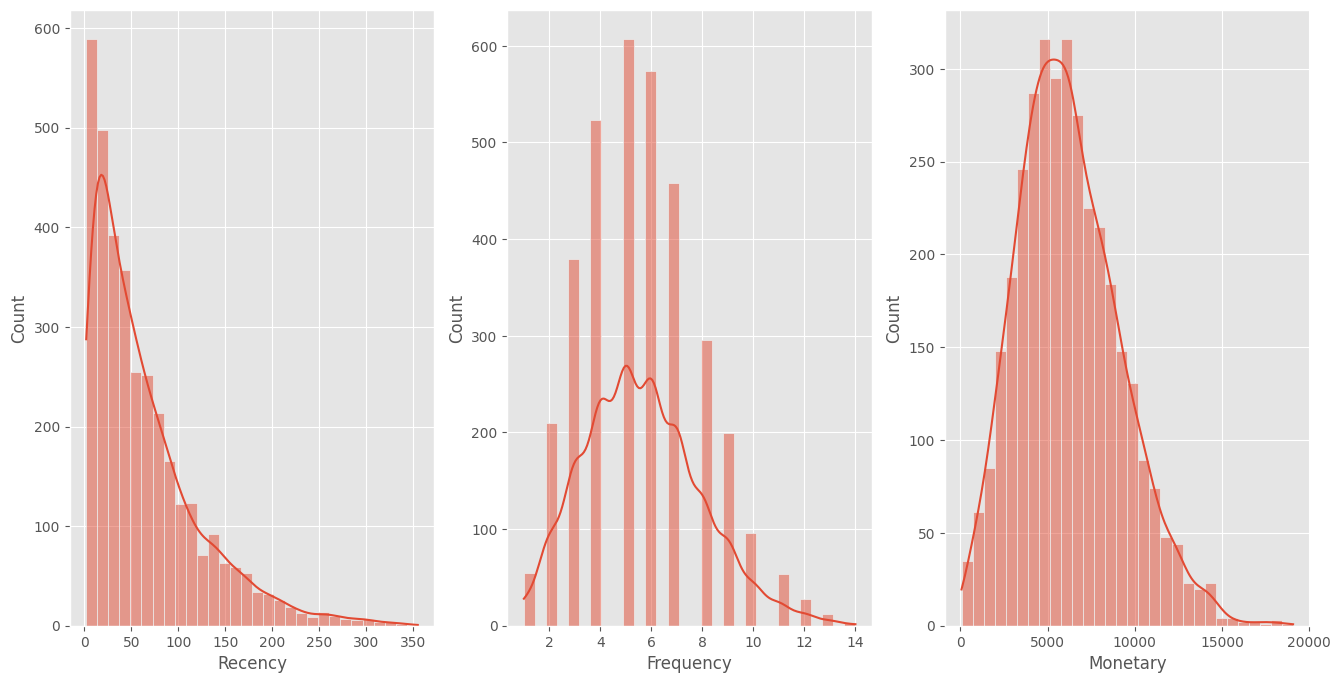

In [61]:
#visualize Recency, Frequency, Monetary values
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
sns.histplot(rfm_df['Recency'], kde=True, ax=ax[0], bins=30)
sns.histplot(rfm_df['Frequency'], kde=True, ax=ax[1], bins=30)
sns.histplot(rfm_df['Monetary'], kde=True, ax=ax[2], bins=30)

- Tính R, F, M score và RFM score

In [62]:
# Calculate quintile for Recency, Frequency, Monetary
quintile = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()
quintile

{'Recency': {0.2: 16.0, 0.4: 35.0, 0.6: 61.0, 0.8: 102.0},
 'Frequency': {0.2: 4.0, 0.4: 5.0, 0.6: 6.0, 0.8: 7.0},
 'Monetary': {0.2: 3716.6040000000003,
  0.4: 5198.102,
  0.6: 6662.591999999999,
  0.8: 8613.750000000002}}

In [63]:
#write func to assign rank from 1 to 5
#A smaller Recency value is better, higher Frequency and Monetary values are better
def r_score(x):
  """calculate R score using quintile
     smaller Recency value is better
  """
  if x <= quintile['Recency'][0.2]:
    return 5
  elif quintile['Recency'][0.2] < x <= quintile['Recency'][0.4]:
    return 4
  elif quintile['Recency'][0.4] < x <= quintile['Recency'][0.6]:
    return 3
  elif quintile['Recency'][0.6] < x <= quintile['Recency'][0.8]:
    return 2
  else:
    return 1

def fm_score(x, c):
  """calculate F, M score using quintile
     higher Frequency and Monetary values are better
  """
  if x <= quintile[c][0.2]:
    return 1
  elif quintile[c][0.2] < x <= quintile[c][0.4]:
    return 2
  elif quintile[c][0.4] < x <= quintile[c][0.6]:
    return 3
  elif quintile[c][0.6] < x <= quintile[c][0.8]:
    return 4
  else:
    return 5

In [64]:
# Calculate R, F, M score
rfm_df['R_Score'] = rfm_df['Recency'].apply(lambda x: r_score(x))
rfm_df['F_Score'] = rfm_df['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm_df['M_Score'] = rfm_df['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

In [65]:
#get RFM score
rfm_df['RFM_Score'] = 0.15*rfm_df['R_Score'] + 0.28*rfm_df['F_Score'] + 0.57*rfm_df['M_Score']
rfm_df['RFM_ScoreGroup'] = rfm_df['R_Score'].map(str) + rfm_df['F_Score'].map(str) + rfm_df['M_Score'].map(str)
rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_ScoreGroup
0,1931,25,3,2218.50,4,1,1,1.45,411
1,3490,168,5,4739.70,1,2,2,1.85,122
2,3062,48,6,6083.87,3,3,3,3.00,333
3,2805,5,5,5915.90,5,2,3,3.02,523
4,523,20,6,6485.21,4,3,3,3.15,433
...,...,...,...,...,...,...,...,...,...
3488,2122,10,2,1275.53,5,1,1,1.60,511
3489,2417,24,1,1129.13,4,1,1,1.45,411
3490,3464,19,1,748.17,4,1,1,1.45,411
3491,1485,6,2,1871.67,5,1,1,1.60,511


In [66]:
rfm_df['RFM_Score'].describe()

count    3493.000000
mean        2.915053
std         1.259952
min         1.000000
25%         1.730000
50%         2.850000
75%         4.000000
max         5.000000
Name: RFM_Score, dtype: float64

- Segmentation based on RFM Score

In [67]:
# Create segment threshold
quartile = rfm_df['RFM_Score'].quantile([0.25, 0.5, 0.75]).to_dict()
quartile

{0.25: 1.73, 0.5: 2.85, 0.75: 4.0}

In [68]:
#write func to segment customer
def segment_cust(x):
  """segment customer based on quartile"""
  if x <= quartile[0.25]:
    return "Bronze"
  elif quartile[0.25] < x <= quartile[0.5]:
    return "Silver"
  elif quartile[0.5] < x <= quartile[0.75]:
    return "Gold"
  else:
    return "Platinum"

rfm_df['Segment'] = rfm_df['RFM_Score'].apply(lambda x: segment_cust(x))
rfm_df

,customer_id,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,RFM_ScoreGroup,Segment
0,1931,25,3,2218.50,4,1,1,1.45,411,Bronze
1,3490,168,5,4739.70,1,2,2,1.85,122,Silver
2,3062,48,6,6083.87,3,3,3,3.00,333,Gold
3,2805,5,5,5915.90,5,2,3,3.02,523,Gold
4,523,20,6,6485.21,4,3,3,3.15,433,Gold
...,...,...,...,...,...,...,...,...,...,...
3488,2122,10,2,1275.53,5,1,1,1.60,511,Bronze
3489,2417,24,1,1129.13,4,1,1,1.45,411,Bronze
3490,3464,19,1,748.17,4,1,1,1.45,411,Bronze
3491,1485,6,2,1871.67,5,1,1,1.60,511,Bronze


In [69]:
rfm_df['Segment'].value_counts()

Segment
Gold        894
Silver      876
Bronze      875
Platinum    848
Name: count, dtype: int64

In [70]:
rfm_df.duplicated().sum()

0

In [71]:
rfm_df.isna().sum()

customer_id       0
Recency           0
Frequency         0
Monetary          0
R_Score           0
F_Score           0
M_Score           0
RFM_Score         0
RFM_ScoreGroup    0
Segment           0
dtype: int64

<Axes: xlabel='Segment', ylabel='count'>

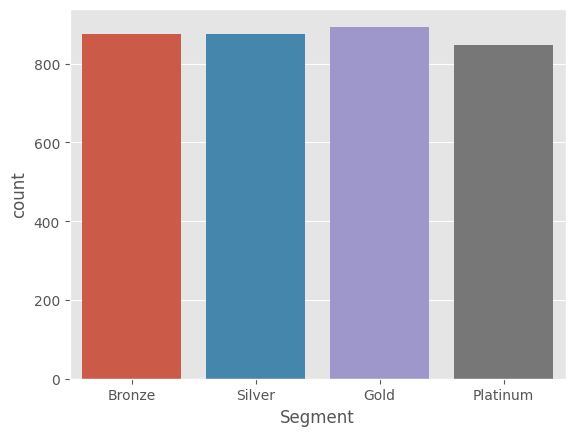

In [72]:
sns.countplot(data=rfm_df, x='Segment')

<Axes: xlabel='Recency', ylabel='Count'>

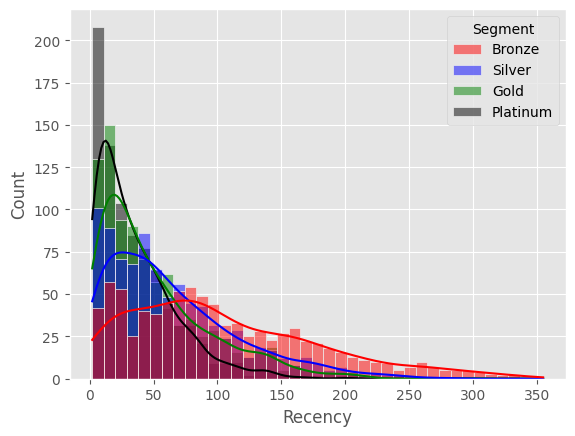

In [73]:
palette = ['red', 'blue','green','k']
sns.histplot(x='Recency',hue= 'Segment', data= rfm_df, palette=palette, kde=True)

<Axes: xlabel='Frequency', ylabel='Count'>

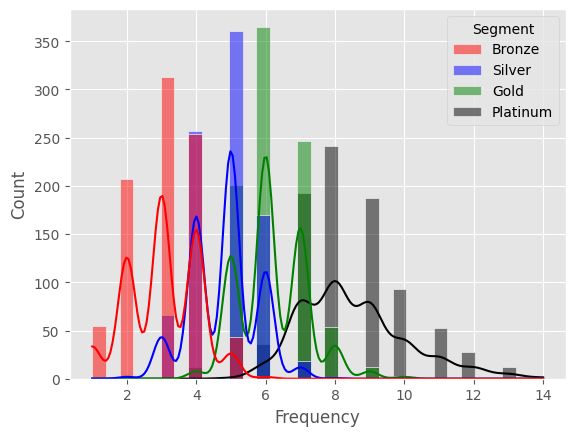

In [74]:
palette = ['red', 'blue','green','k']
sns.histplot(x='Frequency',hue= 'Segment', data= rfm_df, palette=palette, kde=True)

<Axes: xlabel='Monetary', ylabel='Count'>

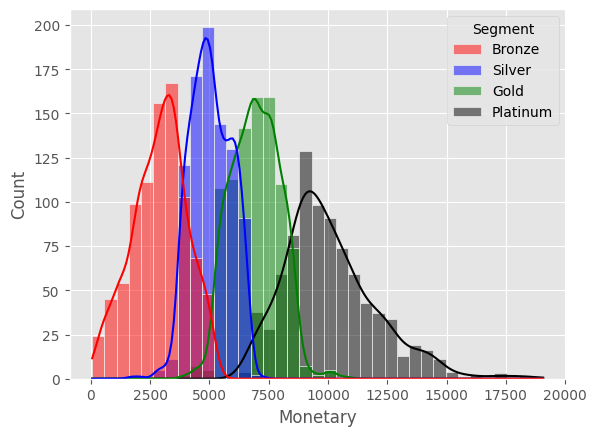

In [75]:
palette = ['red', 'blue','green','k']
sns.histplot(x='Monetary',hue= 'Segment', data= rfm_df, palette=palette, kde=True)

*Customer Segmentations:*

- `Bronze` segmentation: Bronze customers are customers who have not purchased for a long time, the number of days from the last purchase (Recency) to the date of analysis is mainly in the range of 70-80 days. The number of orders purchased in the analysis period (Frequency) ranges from 2-4 orders, the total amount spent in the analysis period (Monetary) ranges from $2400-$2700.

- `Silver` segmentation: Silver customers have a shorter number of days from last purchase (Recency) to analysis date, mostly between 30-45 days. The number of orders purchased in the analysis period (Frequency) ranges from 4-6 orders, the total amount spent in the analysis period (Monetary) ranges from $4800-$5200.

- `Gold` segmentation: Gold customers have a short number of days from last purchase (Recency) to analysis date, mostly between 15-30 days. The number of orders purchased in the analysis period (Frequency) ranges from 5-7 orders, the total amount spent in the analysis period (Monetary) ranges from $7300-$7550.

- `Platinum` segmentation: Platinum customers are customers who make frequent purchases from the last purchase (Recency) to the shortest analysis date, mainly in the range of 7-14 days. The number of orders purchased in the analysis period (Frequency) ranges from 7-10 orders, the total amount spent in the analysis period (Monetary) ranges from $8500-$10200.

## **Exploring CustomerDemgraphic Dataset**

### **- Understanding the big picture**

**Column Description**

There are 4000 rows and 12 columns in `CustomerDemographic` dataset

- `first_name`: dtype: string - context: First name of customer
- `last_name`: dtype: string - context: Last name of customer
- `gender`: dtype: category - context: Gender of customer
- `past_3_years_bike_related_purchases`: dtype: float - context: Bicycle-related purchases in the past 3 years
- `DOB`: dtype: datetime - context: Date of birth of customer
- `job_title`: dtype: category - context: Job title of customer
- `job_industry_category`: dtype: category - context: Job industry category of customer
- `wealth_segment`: dtype: category - context: Wealth segment of customer
- `deceased_indicator`: dtype: category - context: Is the customer still alive?
- `owns_car`: dtype category (binary) - context: Does the customer own a car?
- `tenure`: dtype: int - context: Number of years since the customer became a customer of the company
- `address`: dtype: string - context: Address of customer

In [76]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [77]:
# The values in default column are inconsistent, hence dropping the column 
CustomerDemographic.drop('default', axis=1, inplace=True)

In [78]:
CustomerDemographic.shape

(4000, 12)

In [79]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  owns_car                             4000 non-null   object 
 11  tenure                        

In [80]:
CustomerDemographic.describe(include='all')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
count,4000.000000,4000,3875,4000,4000.000000,3913,3494,3344,4000,4000,4000,3913.000000
unique,NaN,3139,3725,6,NaN,3448,195,9,3,2,2,NaN
top,NaN,Max,Pristnor,Female,NaN,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,Yes,NaN
freq,NaN,5,3,2037,NaN,7,45,799,2000,3998,2024,NaN
mean,2000.500000,NaN,NaN,NaN,48.890000,NaN,NaN,NaN,NaN,NaN,NaN,10.657041
std,1154.844867,NaN,NaN,NaN,28.715005,NaN,NaN,NaN,NaN,NaN,NaN,5.660146
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,1000.750000,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000
50%,2000.500000,NaN,NaN,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.000000
75%,3000.250000,NaN,NaN,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000


### **- Preparation (Clean Data)**

In [81]:
CustomerDemographic.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [82]:
CustomerDemographic.duplicated().sum()

0

In [83]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [84]:
CustomerDemographic['customer_id'].nunique()

4000

In [85]:
CustomerDemographic['last_name'] = CustomerDemographic['last_name'].fillna(method='bfill')

In [86]:
CustomerDemographic['gender'].value_counts(dropna=False)

gender
Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: count, dtype: int64

In [87]:
gender = ['Male','Female','Unspecified']

male = "Male|M"
female = "Female|F|Femal"
unspecifeid = "U"

conditions = [
    (CustomerDemographic['gender'].str.contains(male)),
    (CustomerDemographic['gender'].str.contains(female)),
    (CustomerDemographic['gender'].str.contains(unspecifeid))
    ]

CustomerDemographic['gender'] = np.select(conditions, gender, default='Other')

In [88]:
CustomerDemographic['DOB'] = pd.to_datetime(CustomerDemographic['DOB'],format='%Y-%m-%d')

In [89]:
CustomerDemographic['DOB'] = CustomerDemographic['DOB'].fillna(method='bfill')

In [90]:
CustomerDemographic['DOB'].describe()

count                             4000
mean     1977-08-01 16:16:40.800000032
min                1843-12-21 00:00:00
25%                1968-02-02 06:00:00
50%                1977-08-15 12:00:00
75%                1987-03-21 18:00:00
max                2002-03-11 00:00:00
Name: DOB, dtype: object

In [91]:
CustomerDemographic.loc[CustomerDemographic['DOB']=='1843-12-21',:]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
33,34,Jephthah,Bachmann,Unspecified,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0


In [92]:
# Drop DOB seems impractical
CustomerDemographic = CustomerDemographic.drop(33).reset_index(drop=True)

In [93]:
CustomerDemographic['job_industry_category'] = CustomerDemographic['job_industry_category'].fillna(method='ffill')
CustomerDemographic['job_title'] = CustomerDemographic['job_title'].fillna(method='bfill')

In [94]:
CustomerDemographic['deceased_indicator'].value_counts(dropna=False)

deceased_indicator
N    3997
Y       2
Name: count, dtype: int64

In [95]:
CustomerDemographic.query("deceased_indicator=='Y'")

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
751,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Y,Yes,6.0
3788,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Y,Yes,9.0


In [96]:
# Remove deceased customers
CustomerDemographic = CustomerDemographic.drop([751,3788]).reset_index(drop=True)
CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,Calton,Male,33,1961-10-03,Senior Editor,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3992,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3993,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3994,3998,Sarene,Woolley,Unspecified,60,1973-10-24,Assistant Manager,IT,High Net Worth,N,No,NaN
3995,3999,Patrizius,Oldland,Male,11,1973-10-24,Software Engineer IV,Manufacturing,Affluent Customer,N,Yes,10.0


In [97]:
mode_tenure = CustomerDemographic['tenure'].mode()[0]
CustomerDemographic['tenure'].fillna(mode_tenure, inplace=True)

## **Exploring CustomerAddress Dataset**

### **- Understanding the big picture**

**Column Description**

There are 3999 rows and 6 columns in `CustomerAddress` dataset

- `customer_id`: dtype: int - context: ID of customer
- `address`: dtype: string - context: Address of customer
- `postcode`: dtype: category - context: Postcode of city that the customer lives
- `state`: dtype: category - context: State where the customer lives
- `country`: dtype: category - context: Country where the customer lives
- `property_valuation`: dtype: int - context: Property valuation of customer


In [98]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [99]:
CustomerAddress.shape

(3999, 6)

In [100]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [101]:
CustomerAddress.describe(include='all')

,customer_id,address,postcode,state,country,property_valuation
count,3999.000000,3999,3999.000000,3999,3999,3999.000000
unique,NaN,3996,NaN,5,1,NaN
top,NaN,3 Mariners Cove Terrace,NaN,NSW,Australia,NaN
freq,NaN,2,NaN,2054,3999,NaN
mean,2003.987997,NaN,2985.755939,NaN,NaN,7.514379
std,1154.576912,NaN,844.878364,NaN,NaN,2.824663
min,1.000000,NaN,2000.000000,NaN,NaN,1.000000
25%,1004.500000,NaN,2200.000000,NaN,NaN,6.000000
50%,2004.000000,NaN,2768.000000,NaN,NaN,8.000000
75%,3003.500000,NaN,3750.000000,NaN,NaN,10.000000


### **- Preparation (Clean Data)**

In [102]:
CustomerAddress.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [103]:
CustomerAddress.duplicated().sum()

0

In [104]:
CustomerAddress['state'].value_counts(dropna=False)

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: count, dtype: int64

In [105]:
CustomerAddress['state'] = CustomerAddress['state'].replace(['New South Wales','Victoria'],['NSW','VIC'])

In [106]:
CustomerAddress['property_valuation'].value_counts(dropna=False)

property_valuation
9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: count, dtype: int64

In [107]:
# Merge CustomerDemographic with CustomerAddress and rfm_df
df = pd.merge(CustomerDemographic,CustomerAddress,on='customer_id',how='inner')
df = pd.merge(df, rfm_df[['customer_id','Segment']], on='customer_id')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Segment
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10,Platinum
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10,Bronze
2,4,Talbot,Calton,Male,33,1961-10-03,Senior Editor,IT,Mass Customer,N,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9,Bronze
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,IT,Affluent Customer,N,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4,Gold
4,6,Curr,Duckhouse,Male,35,1966-09-16,Media Manager I,Retail,High Net Worth,N,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9,Silver


In [108]:
df['age'] = (analysis_date - df['DOB']).dt.days // 365

In [109]:
# Create age_group demographic
label = ['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+']
bins = [0,19,29,39,49,59,69,79,100]
df['age_group'] = pd.cut(df['age'],labels=label,bins=bins)

### **- Study of ralationship between variables**

*Univariate Analysis*

In [110]:
df['gender'].value_counts(dropna=False)

gender
Female         1756
Male           1654
Unspecified      76
Name: count, dtype: int64

In [111]:
df['gender'] = df['gender'].replace('Unspecified',np.nan)
df['gender'] = df['gender'].fillna(method='ffill')
df['gender'].value_counts(dropna=False)

gender
Female    1794
Male      1692
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  T

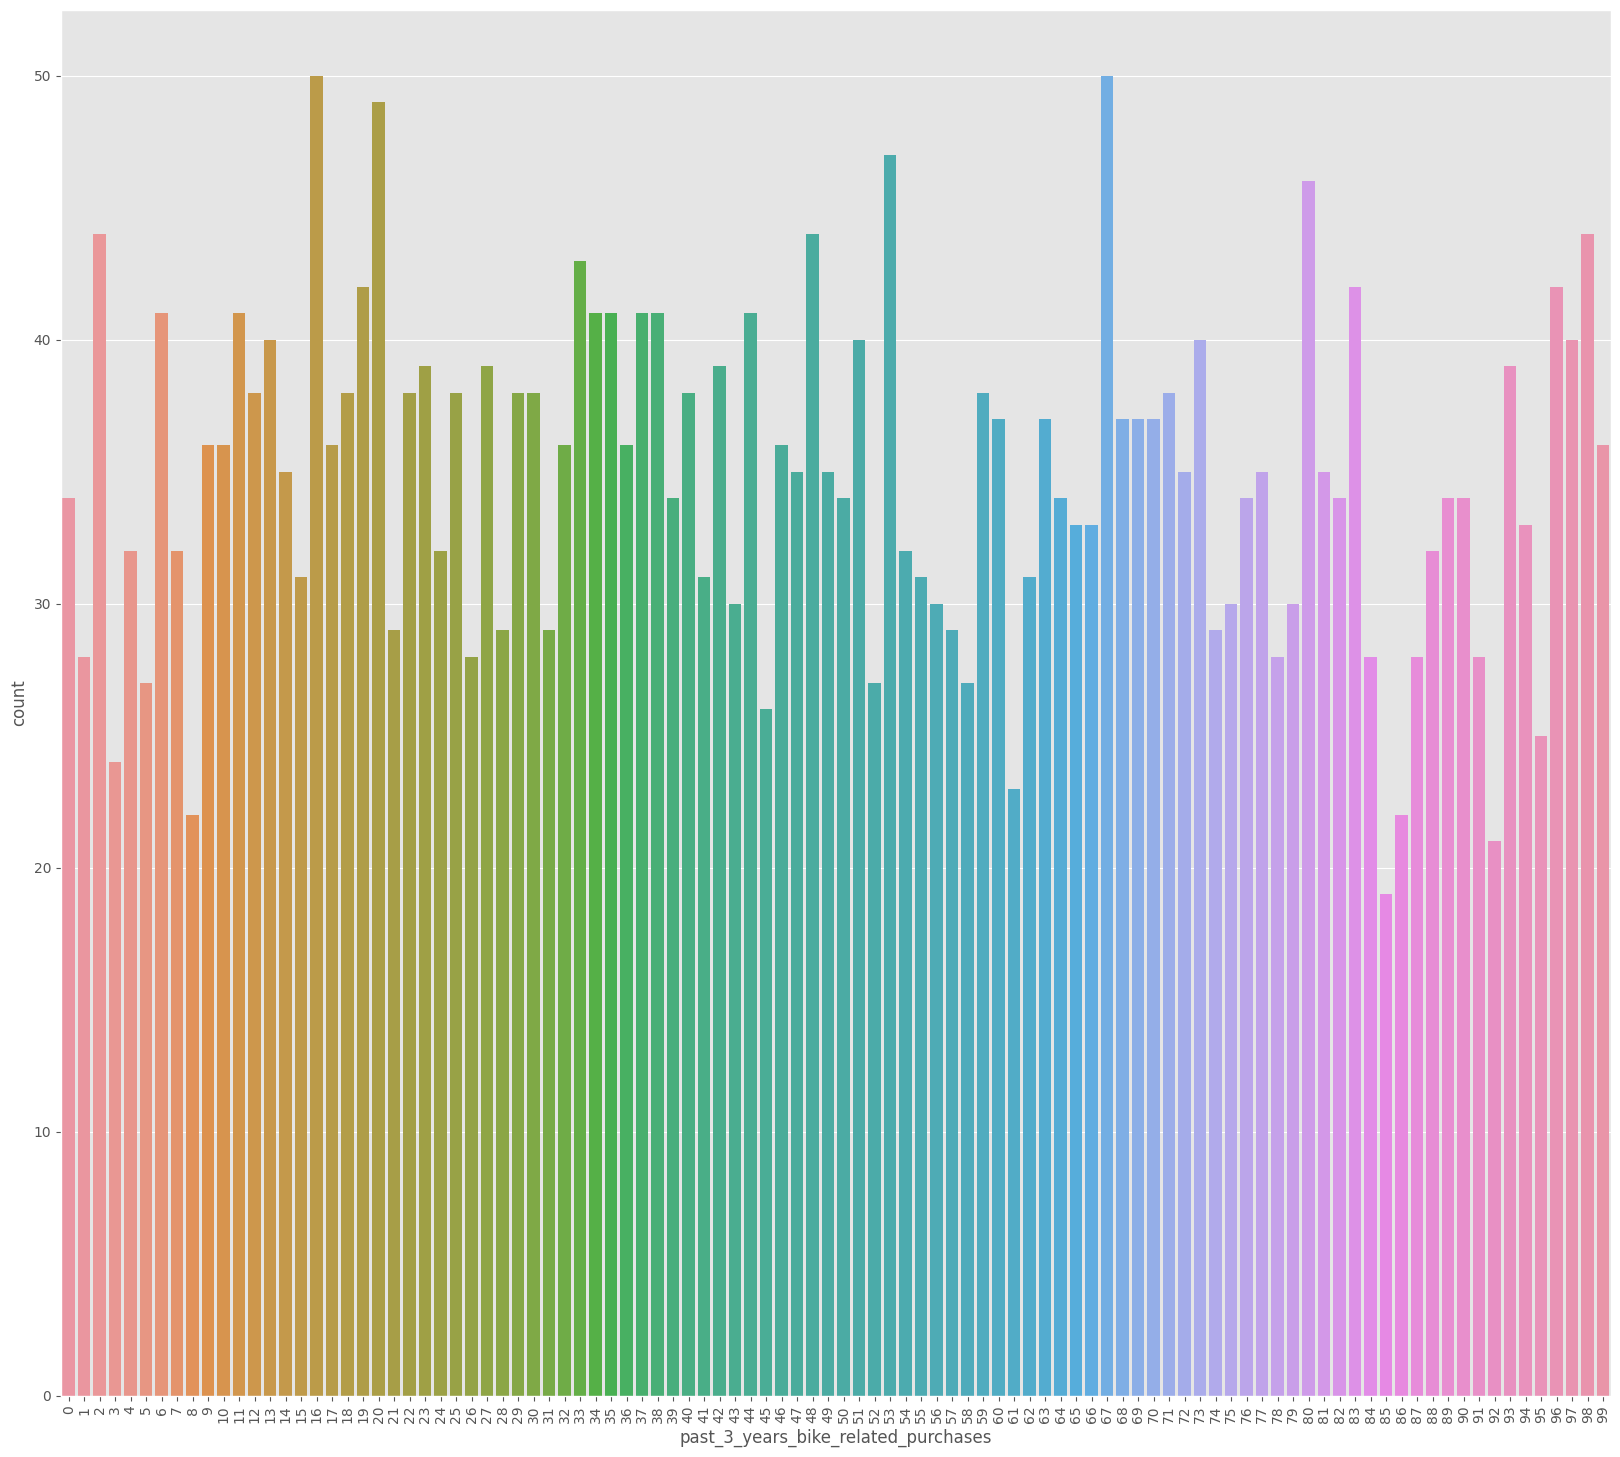

In [112]:
plt.subplots(figsize=(20,18))
sns.countplot(data=df,x='past_3_years_bike_related_purchases')
plt.xticks(rotation=90)

In [113]:
# Top 10 job_title of customer
df['job_title'].value_counts(dropna=False).reset_index()[:10]

,job_title,count
0,Social Worker,46
1,Business Systems Development Analyst,45
2,Internal Auditor,44
3,Tax Accountant,41
4,Associate Professor,40
5,Senior Developer,40
6,General Manager,40
7,VP Quality Control,39
8,Structural Engineer,39
9,Legal Assistant,39


In [114]:
df['job_industry_category'].value_counts(dropna=False).reset_index()

,job_industry_category,count
0,Manufacturing,838
1,Financial Services,815
2,Health,631
3,Retail,368
4,Property,275
5,IT,228
6,Entertainment,143
7,Argiculture,115
8,Telecommunications,73


In [115]:
df['wealth_segment'].value_counts(dropna=False).reset_index()

,wealth_segment,count
0,Mass Customer,1744
1,High Net Worth,894
2,Affluent Customer,848


In [116]:
df['owns_car'].value_counts(dropna=False).reset_index()

,owns_car,count
0,Yes,1766
1,No,1720


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '21.0'),
  Text(21, 0, '22.0')])

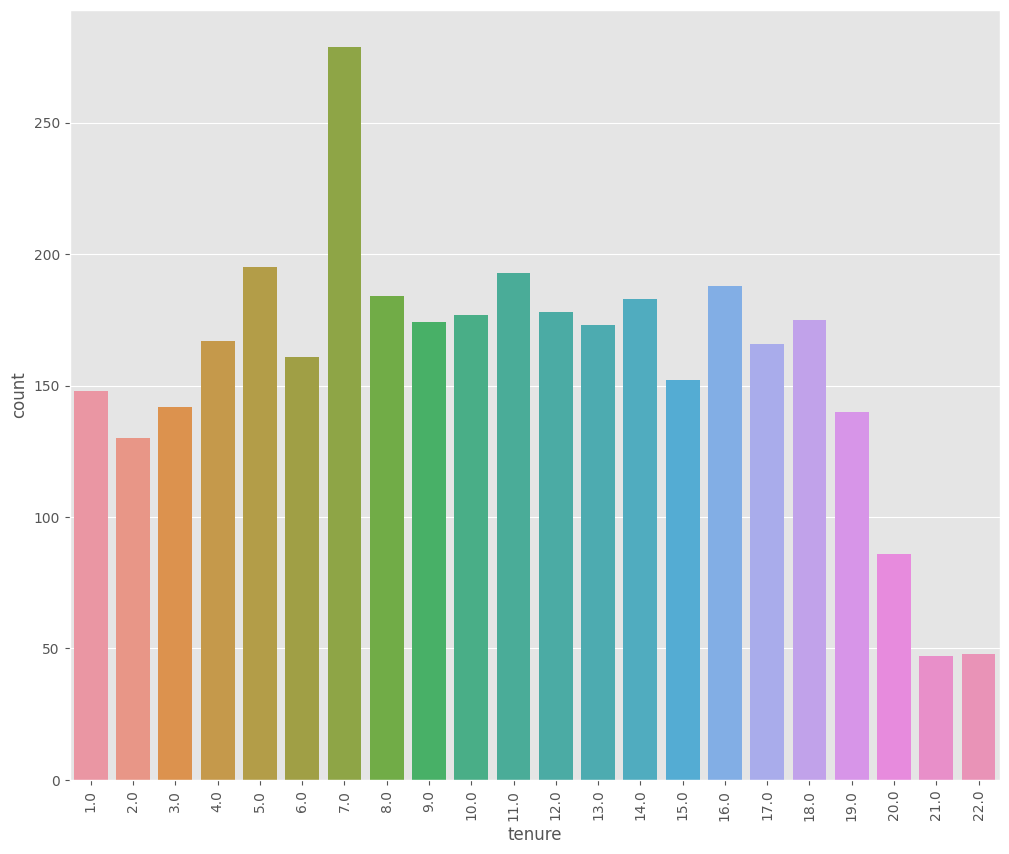

In [117]:
tenure1 = df['tenure'].value_counts(dropna=False).reset_index().sort_values(by='tenure')
plt.subplots(figsize=(12,10))
sns.countplot(data=df,x='tenure')
plt.xticks(rotation=90)

In [118]:
df['postcode'].nunique()

835

In [119]:
df['state'].value_counts(dropna=False).reset_index()

,state,count
0,NSW,1864
1,VIC,880
2,QLD,742


<Axes: xlabel='property_valuation', ylabel='count'>

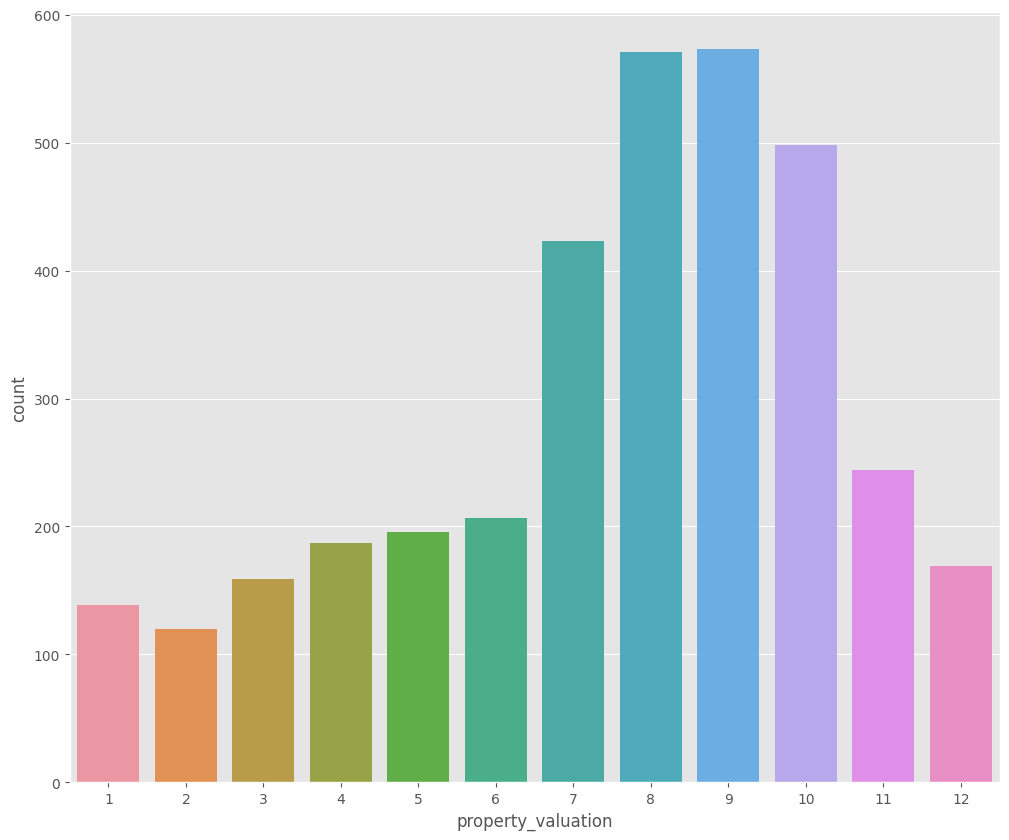

In [120]:
plt.subplots(figsize=(12,10))
sns.countplot(data=df,x='property_valuation')

In [121]:
df['Segment'].value_counts(dropna=False).reset_index()

,Segment,count
0,Gold,892
1,Silver,875
2,Bronze,874
3,Platinum,845


In [122]:
df['age_group'].value_counts(dropna=False).reset_index()

,age_group,count
0,40-49,971
1,30-39,844
2,20-29,623
3,50-59,604
4,60-69,238
5,<20,201
6,70-79,3
7,80+,2


*Insights after Univariate Analysis*:

(Analysis of all customers who made transactions in 2017)

- Females make more transactions, but insignificantly larger percentage.
- Industries such as Manufacturing, Financial Services and Health have the largest number of transactions.
- The Mass Customer group has the largest number of transactions, the remaining 2 groups have approximately the same number of transactions.
- The percentage of customers who own cars making transactions is approximately the rate of customers who do not own cars that make transactions.
- Customers in NSW state make the most transactions.
- Customers who make transactions have a property valuation of 7 to 10.
- The transactions are mainly made by customers between the ages of 20 and 59. In which, the most are the age group from 40 to 49.


*Bivariate Analysis*

Text(0.5, 1.05, 'Age_group by gender')

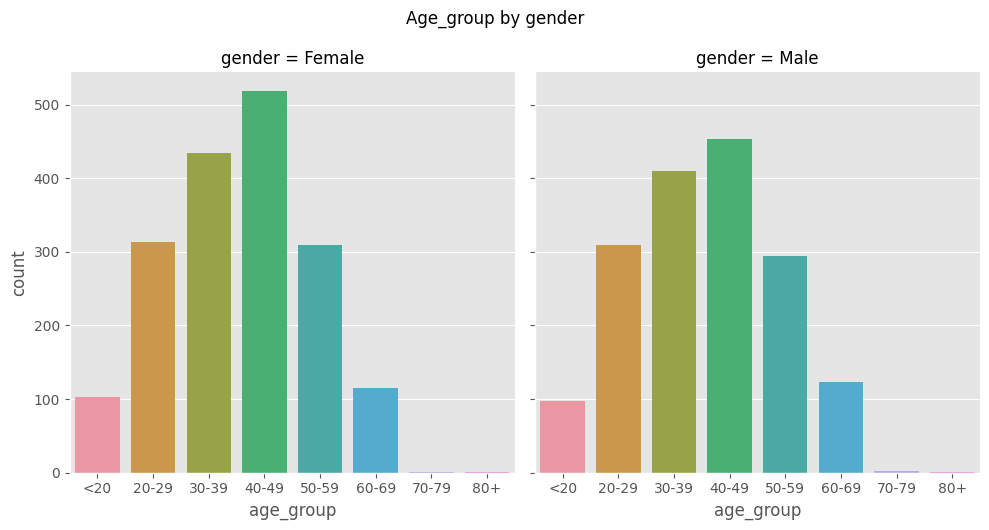

In [123]:
# gender vs age_group
g = sns.catplot(data=df,x='age_group',col='gender',kind='count')
g.fig.suptitle('Age_group by gender',y=1.05,fontsize=12)

In [124]:
ageGroup_gender_count = df.groupby(['age_group','gender'])['gender'].count().unstack(level=1)
ageGroup_gender_pct = (ageGroup_gender_count.div(ageGroup_gender_count.sum(axis=1),axis=0))*100
ageGroup_gender_pct.columns = ['Female (%)', 'Male (%)']
ageGroup_gender = pd.concat([ageGroup_gender_count,ageGroup_gender_pct],axis=1)
ageGroup_gender

,Female,Male,Female (%),Male (%)
age_group,,,,
<20,103,98,51.243781,48.756219
20-29,313,310,50.240770,49.759230
30-39,434,410,51.421801,48.578199
40-49,518,453,53.347065,46.652935
50-59,309,295,51.158940,48.841060
60-69,115,123,48.319328,51.680672
70-79,1,2,33.333333,66.666667
80+,1,1,50.000000,50.000000


In [125]:
# gender vs wealth_segment
wealth_gender_count = df.groupby(['wealth_segment','gender'])['gender'].count().unstack(level=1)
wealth_gender_pct = (wealth_gender_count.div(wealth_gender_count.sum(axis=1),axis=0))*100
wealth_gender_pct.columns = ['Female (%)', 'Male (%)']
wealth_gender = pd.concat([wealth_gender_count,wealth_gender_pct],axis=1)
wealth_gender

,Female,Male,Female (%),Male (%)
wealth_segment,,,,
Affluent Customer,420,428,49.528302,50.471698
High Net Worth,459,435,51.342282,48.657718
Mass Customer,915,829,52.465596,47.534404


Text(0.5, 1.05, 'Wealth_segment by gender')

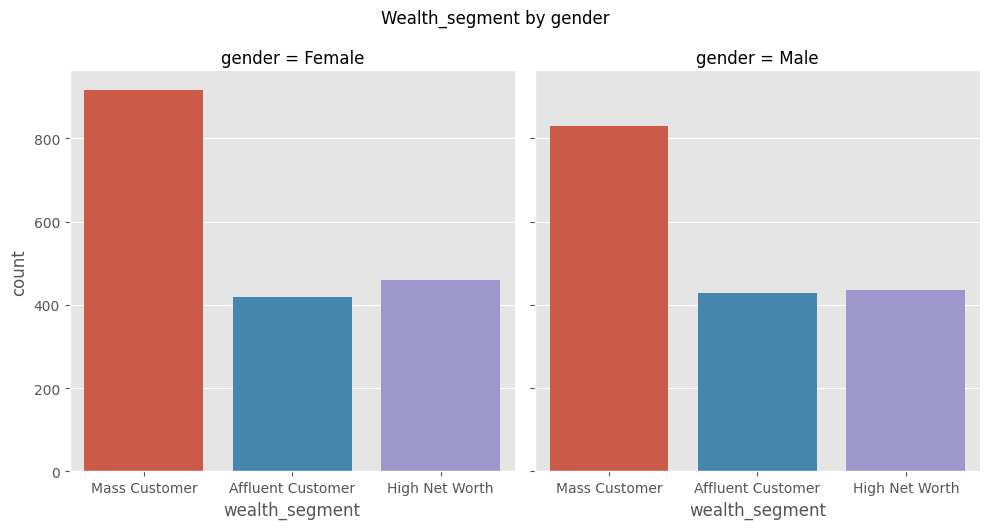

In [126]:
g = sns.catplot(data=df,x='wealth_segment',col='gender',kind='count')
g.fig.suptitle('Wealth_segment by gender',y=1.05,fontsize=12)

In [127]:
# wealth_segment and age_group
wealth_ageGroup_count = df.groupby(['wealth_segment','age_group'])['wealth_segment'].count().unstack(level=0)
wealth_ageGroup_pct = (wealth_ageGroup_count.div(wealth_ageGroup_count.sum(axis=1),axis=0))*100
wealth_ageGroup_pct.columns = ['Affluent Customer (%)', 'High Net Worth (%)','Mass Customer (%)']
wealth_ageGroup = pd.concat([wealth_ageGroup_count,wealth_ageGroup_pct],axis=1)
wealth_ageGroup

,Affluent Customer,High Net Worth,Mass Customer,Affluent Customer (%),High Net Worth (%),Mass Customer (%)
age_group,,,,,,
<20,52,51,98,25.870647,25.373134,48.756219
20-29,151,155,317,24.237560,24.879615,50.882825
30-39,195,218,431,23.104265,25.829384,51.066351
40-49,236,252,483,24.304840,25.952626,49.742533
50-59,158,155,291,26.158940,25.662252,48.178808
60-69,54,62,122,22.689076,26.050420,51.260504
70-79,1,1,1,33.333333,33.333333,33.333333
80+,1,0,1,50.000000,0.000000,50.000000


In [128]:
ageGroup_gender_wealthSegment = df.groupby(['age_group','wealth_segment','gender'])['gender']\
                                .count().unstack(level=1).unstack(level=1)
ageGroup_gender_wealthSegment

wealth_segment Affluent Customer      High Net Worth      Mass Customer     
gender                    Female Male         Female Male        Female Male
age_group                                                                   
<20                           28   24             25   26            50   48
20-29                         73   78             83   72           157  160
30-39                         92  103            126   92           216  215
40-49                        122  114            125  127           271  212
50-59                         87   71             69   86           153  138
60-69                         18   36             31   31            66   56
70-79                          0    1              0    1             1    0
80+                            0    1              0    0             1    0

In [129]:
ageGroup_gender_wealthSegment_pct = ageGroup_gender_wealthSegment\
                                    .div(ageGroup_gender_wealthSegment.sum(axis=1), axis=0) * 100
ageGroup_gender_wealthSegment_pct.columns = ageGroup_gender_wealthSegment_pct.columns.rename('gender (%)',level=1)
ageGroup_gender_wealthSegment_pct

wealth_segment Affluent Customer            High Net Worth              
gender (%)                Female       Male         Female       Male   
age_group                                                               
<20                    13.930348  11.940299      12.437811  12.935323  \
20-29                  11.717496  12.520064      13.322632  11.556982   
30-39                  10.900474  12.203791      14.928910  10.900474   
40-49                  12.564367  11.740474      12.873326  13.079300   
50-59                  14.403974  11.754967      11.423841  14.238411   
60-69                   7.563025  15.126050      13.025210  13.025210   
70-79                   0.000000  33.333333       0.000000  33.333333   
80+                     0.000000  50.000000       0.000000   0.000000   

wealth_segment Mass Customer             
gender (%)            Female       Male  
age_group                                
<20                24.875622  23.880597  
20-29              25.200642  25.682183  
30-39              25.592417  25.473934  
40-49              27.909372  21.833162  
50-59              25.331126  22.847682  
60-69              27.731092  23.529412  
70-79              33.333333   0.000000  
80+                50.000000   0.000000

In [130]:
# age_group vs owns_car
ageGroup_car_count = df.groupby(['age_group','owns_car'])['owns_car'].count().unstack(level=1)
ageGroup_car_pct = (ageGroup_car_count.div(ageGroup_car_count.sum(axis=1),axis=0)*100)
ageGroup_car_pct.columns = ['No (%)', 'Yes (%)']
ageGroup_car = pd.merge(ageGroup_car_count,ageGroup_car_pct, on='age_group')
ageGroup_car

,No,Yes,No (%),Yes (%)
age_group,,,,
<20,96,105,47.761194,52.238806
20-29,304,319,48.796148,51.203852
30-39,421,423,49.881517,50.118483
40-49,476,495,49.021627,50.978373
50-59,294,310,48.675497,51.324503
60-69,126,112,52.941176,47.058824
70-79,1,2,33.333333,66.666667
80+,2,0,100.000000,0.000000


In [131]:
# owns_car vs wealth_segment
wealthSegment_car_count = df.groupby(['wealth_segment','owns_car'])['owns_car'].count().unstack(level=1)
wealthSegment_car_pct = (wealthSegment_car_count.div(wealthSegment_car_count.sum(axis=1),axis=0)*100)
wealthSegment_car_pct.columns = ['No (%)', 'Yes (%)']
wealthSegemnt_car = pd.concat([wealthSegment_car_count,wealthSegment_car_pct],axis=1)
wealthSegemnt_car

,No,Yes,No (%),Yes (%)
wealth_segment,,,,
Affluent Customer,402,446,47.405660,52.594340
High Net Worth,437,457,48.881432,51.118568
Mass Customer,881,863,50.516055,49.483945


In [132]:
ageGroup_car_wealthSegment = df.groupby(['age_group','wealth_segment','owns_car'])['owns_car']\
                                .count().unstack(level=1).unstack(level=1)
ageGroup_car_wealthSegment

wealth_segment Affluent Customer      High Net Worth      Mass Customer     
owns_car                      No  Yes             No  Yes            No  Yes
age_group                                                                   
<20                           31   21             19   32            46   52
20-29                         79   72             80   75           145  172
30-39                         85  110            115  103           221  210
40-49                        107  129            121  131           248  235
50-59                         69   89             70   85           155  136
60-69                         30   24             32   30            64   58
70-79                          0    1              0    1             1    0
80+                            1    0              0    0             1    0

In [133]:
ageGroup_car_wealthSegment_pct = (ageGroup_car_wealthSegment.div(
    ageGroup_car_wealthSegment.sum(axis=1),axis=0
)*100)
ageGroup_car_wealthSegment_pct.columns = ageGroup_car_wealthSegment_pct.columns.rename('onws_car (%)',level=1)
ageGroup_car_wealthSegment_pct

wealth_segment Affluent Customer            High Net Worth              
onws_car (%)                  No        Yes             No        Yes   
age_group                                                               
<20                    15.422886  10.447761       9.452736  15.920398  \
20-29                  12.680578  11.556982      12.841091  12.038523   
30-39                  10.071090  13.033175      13.625592  12.203791   
40-49                  11.019567  13.285273      12.461380  13.491246   
50-59                  11.423841  14.735099      11.589404  14.072848   
60-69                  12.605042  10.084034      13.445378  12.605042   
70-79                   0.000000  33.333333       0.000000  33.333333   
80+                    50.000000   0.000000       0.000000   0.000000   

wealth_segment Mass Customer             
onws_car (%)              No        Yes  
age_group                                
<20                22.885572  25.870647  
20-29              23.274478  27.608347  
30-39              26.184834  24.881517  
40-49              25.540680  24.201854  
50-59              25.662252  22.516556  
60-69              26.890756  24.369748  
70-79              33.333333   0.000000  
80+                50.000000   0.000000

In [134]:
# age_group vs job_industry_category
ageGroup_jobIndustry_count = df.groupby(['age_group','job_industry_category'])['job_industry_category'].count().unstack(level=1)
ageGroup_jobIndustry_pct = (ageGroup_jobIndustry_count.div(ageGroup_jobIndustry_count.sum(axis=1),axis=0)*100)
ageGroup_jobIndustry_pct.columns = ['Argiculture(%)','Entertainment(%)','Financial Services(%)',
                                    'Health(%)','IT(%)','Manufacturing(%)','Property(%)','Retail(%)',
                                    'Telecommunications(%)']
ageGroup_jobIndustry = pd.concat([ageGroup_jobIndustry_count,ageGroup_jobIndustry_pct],axis=1)
ageGroup_jobIndustry

,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Argiculture(%),Entertainment(%),Financial Services(%),Health(%),IT(%),Manufacturing(%),Property(%),Retail(%),Telecommunications(%)
age_group,,,,,,,,,,,,,,,,,,
<20,8,7,47,33,21,40,14,25,6,3.980100,3.482587,23.383085,16.417910,10.447761,19.900498,6.965174,12.437811,2.985075
20-29,15,22,175,106,35,136,54,68,12,2.407705,3.531300,28.089888,17.014446,5.617978,21.829856,8.667737,10.914928,1.926164
30-39,29,36,190,151,64,214,66,82,12,3.436019,4.265403,22.511848,17.890995,7.582938,25.355450,7.819905,9.715640,1.421801
40-49,42,43,214,191,50,235,67,104,25,4.325438,4.428424,22.039135,19.670443,5.149331,24.201854,6.900103,10.710608,2.574665
50-59,13,29,139,104,38,156,52,60,13,2.152318,4.801325,23.013245,17.218543,6.291391,25.827815,8.609272,9.933775,2.152318
60-69,8,6,50,46,20,55,21,27,5,3.361345,2.521008,21.008403,19.327731,8.403361,23.109244,8.823529,11.344538,2.100840
70-79,0,0,0,0,0,2,1,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,66.666667,33.333333,0.000000,0.000000
80+,0,0,0,0,0,0,0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000


In [135]:
ageGroup_jobIndustry_wealthSegment = df.groupby(['age_group','wealth_segment','job_industry_category'])['job_industry_category']\
                                .count().unstack(level=1).unstack(level=1)
ageGroup_jobIndustry_wealthSegment

wealth_segment        Affluent Customer                                    
job_industry_category       Argiculture Entertainment Financial Services   
age_group                                                                  
<20                                   1             1                  8  \
20-29                                 4             3                 40   
30-39                                 5            12                 57   
40-49                                 9            10                 50   
50-59                                 1             8                 36   
60-69                                 0             0                 15   
70-79                                 0             0                  0   
80+                                   0             0                  0   

wealth_segment                                                   
job_industry_category Health  IT Manufacturing Property Retail   
age_group                                                        
<20                        8   7            13        3      9  \
20-29                     27   8            34       11     21   
30-39                     32  11            47        9     21   
40-49                     37  12            69       18     26   
50-59                     28  10            50       10      9   
60-69                     12   6            13        5      2   
70-79                      0   0             1        0      0   
80+                        0   0             0        0      1   

wealth_segment                           High Net Worth  ...   
job_industry_category Telecommunications    Argiculture  ...   
age_group                                                ...   
<20                                    2              3  ...  \
20-29                                  3              4  ...   
30-39                                  1              9  ...   
40-49                                  5             10  ...   
50-59                                  6              6  ...   
60-69                                  1              4  ...   
70-79                                  0              0  ...   
80+                                    0              0  ...   

wealth_segment                           Mass Customer                 
job_industry_category Telecommunications   Argiculture Entertainment   
age_group                                                              
<20                                    1             4             4  \
20-29                                  3             7            15   
30-39                                  5            15            14   
40-49                                  5            23            21   
50-59                                  2             6            16   
60-69                                  2             4             4   
70-79                                  0             0             0   
80+                                    0             0             0   

wealth_segment                                                               
job_industry_category Financial Services Health  IT Manufacturing Property   
age_group                                                                    
<20                                   26     20   8            18        5  \
20-29                                 92     52  15            76       22   
30-39                                 82     82  39           114       40   
40-49                                 95    104  27           117       32   
50-59                                 69     50  17            69       23   
60-69                                 23     24   9            26       11   
70-79                                  0      0   0             0        1   
80+                                    0      0   0             0        0   

wealth_segment                                   
job_industry_category Retail 

In [136]:
# age_group vs state
ageGroup_state = df.groupby(['age_group','state'])['state'].count().unstack(level=1)
ageGroup_state['total_by_ageGroup'] = ageGroup_state.sum(axis=1)
total_row = ageGroup_state.sum().rename('Total')
ageGroup_state = pd.concat([ageGroup_state,total_row])
ageGroup_state

,NSW,QLD,VIC,total_by_ageGroup,0
<20,102.0,50.0,49.0,201.0,NaN
20-29,332.0,137.0,154.0,623.0,NaN
30-39,450.0,194.0,200.0,844.0,NaN
40-49,527.0,196.0,248.0,971.0,NaN
50-59,322.0,116.0,166.0,604.0,NaN
60-69,129.0,49.0,60.0,238.0,NaN
70-79,1.0,0.0,2.0,3.0,NaN
80+,1.0,0.0,1.0,2.0,NaN
NSW,NaN,NaN,NaN,NaN,1864.0
QLD,NaN,NaN,NaN,NaN,742.0


In [137]:
ageGroup_state_wealthSegment = df.groupby(['age_group','wealth_segment','state'])['state']\
                                .count().unstack(level=1).unstack(level=1)
ageGroup_state_wealthSegment

wealth_segment Affluent Customer         High Net Worth         Mass Customer   
state                        NSW QLD VIC            NSW QLD VIC           NSW   
age_group                                                                       
<20                           23  17  12             28  11  12            51  \
20-29                         77  34  40             87  32  36           168   
30-39                        101  47  47            120  47  51           229   
40-49                        131  51  54            134  48  70           262   
50-59                         85  31  42             77  36  42           160   
60-69                         32   8  14             34  14  14            63   
70-79                          0   0   1              0   0   1             1   
80+                            1   0   0              0   0   0             0   

wealth_segment            
state           QLD  VIC  
age_group                 
<20              22   25  
20-29            71   78  
30-39           100  102  
40-49            97  124  
50-59            49   82  
60-69            27   32  
70-79             0    0  
80+               0    1

In [138]:
ageGroup_state_wealthSegment_pct = ageGroup_state_wealthSegment\
                                    .div(ageGroup_state_wealthSegment.sum(axis=1), axis=0) * 100
ageGroup_state_wealthSegment_pct.columns = ageGroup_state_wealthSegment_pct.columns.rename('state (%)',level=1)
ageGroup_state_wealthSegment_pct

wealth_segment Affluent Customer                      High Net Worth   
state (%)                    NSW       QLD        VIC            NSW   
age_group                                                              
<20                    11.442786  8.457711   5.970149      13.930348  \
20-29                  12.359551  5.457464   6.420546      13.964687   
30-39                  11.966825  5.568720   5.568720      14.218009   
40-49                  13.491246  5.252317   5.561277      13.800206   
50-59                  14.072848  5.132450   6.953642      12.748344   
60-69                  13.445378  3.361345   5.882353      14.285714   
70-79                   0.000000  0.000000  33.333333       0.000000   
80+                    50.000000  0.000000   0.000000       0.000000   

wealth_segment                      Mass Customer                        
state (%)            QLD        VIC           NSW        QLD        VIC  
age_group                                                                
<20             5.472637   5.970149     25.373134  10.945274  12.437811  
20-29           5.136437   5.778491     26.966292  11.396469  12.520064  
30-39           5.568720   6.042654     27.132701  11.848341  12.085308  
40-49           4.943357   7.209063     26.982492   9.989701  12.770340  
50-59           5.960265   6.953642     26.490066   8.112583  13.576159  
60-69           5.882353   5.882353     26.470588  11.344538  13.445378  
70-79           0.000000  33.333333     33.333333   0.000000   0.000000  
80+             0.000000   0.000000      0.000000   0.000000  50.000000

*Insights*:

- Need to focus on customers aged 40-49 in NSW state in the Mass Customer segment, working in the Manufacturing, Financial Service and Health sectors.

In [155]:
df.to_csv('customer.csv')

## **Exploring NewListCustomer Dataset**

### **- Understanding the big picture**

**Column Description**

There are 1000 rows and 18 columns in `NewCustomerList` dataset

- `first_name`: dtype: string - context: First name of customer
- `last_name`: dtype: string - context: Last name of customer
- `gender`: dtype: category - context: Gender of customer
- `past_3_years_bike_related_purchases`: dtype: float - context: Bicycle-related purchases in the past 3 years
- `DOB`: dtype: datetime - context: Date of birth of customer
- `job_title`: dtype: category - context: Job title of customer
- `job_industry_category`: dtype: category - context: Job industry category of customer
- `wealth_segment`: dtype: category - context: Wealth segment of customer
- `deceased_indicator`: dtype: category - context: Is the customer still alive?
- `owns_car`: dtype category (binary) - context: Does the customer own a car?
- `tenure`: dtype: int - context: Number of years since the customer became a customer of the company
- `address`: dtype: string - context: Address of customer
- `postcode`: dtype: category - context: Postcode of city that the customer lives
- `state`: dtype: category - context: State where the customer lives
- `country`: dtype: category - context: Country where the customer lives
- `property_valuation`: dtype: int - context: Property valuation of customer
- `Rank`: dtype: int - context: Customer ranking
- `Value`: dtype: float - context

In [141]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [142]:
NewCustomerList.drop(columns=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19', 'Unnamed: 20'],
                     axis=1,inplace=True)

In [143]:
NewCustomerList.shape

(1000, 18)

In [144]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            971 non-null    object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   DOB                                  983 non-null    object 
 5   job_title                            894 non-null    object 
 6   job_industry_category                835 non-null    object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [145]:
NewCustomerList.describe(include='all')

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
count,1000,971,1000,1000.000000,983,894,835,1000,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000
unique,940,961,3,NaN,961,184,9,3,1,2,NaN,1000,NaN,3,1,NaN,NaN,NaN
top,Rozamond,Sissel,Female,NaN,1965-07-03,Associate Professor,Financial Services,Mass Customer,N,No,NaN,45 Shopko Center,NaN,NSW,Australia,NaN,NaN,NaN
freq,3,2,513,NaN,2,15,203,508,1000,507,NaN,1,NaN,506,1000,NaN,NaN,NaN
mean,NaN,NaN,NaN,49.836000,NaN,NaN,NaN,NaN,NaN,NaN,11.388000,NaN,3019.227000,NaN,NaN,7.397000,498.819000,0.881714
std,NaN,NaN,NaN,27.796686,NaN,NaN,NaN,NaN,NaN,NaN,5.037145,NaN,848.895767,NaN,NaN,2.758804,288.810997,0.293525
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,2000.000000,NaN,NaN,1.000000,1.000000,0.340000
25%,NaN,NaN,NaN,26.750000,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,2209.000000,NaN,NaN,6.000000,250.000000,0.649531
50%,NaN,NaN,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,2800.000000,NaN,NaN,8.000000,500.000000,0.860000
75%,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,3845.500000,NaN,NaN,9.000000,750.250000,1.075000


### **- Preparation (Clean Data)**

In [146]:
NewCustomerList['gender'].value_counts(dropna=False)

gender
Female    513
Male      470
U          17
Name: count, dtype: int64

In [147]:
NewCustomerList['gender'] = NewCustomerList['gender'].replace('U','Unspecifeid')

In [148]:
NewCustomerList['last_name'] = NewCustomerList['last_name'].fillna(method='bfill')

In [149]:
NewCustomerList['DOB'] = pd.to_datetime(NewCustomerList['DOB'], format='%Y-%m-%d')
NewCustomerList['DOB'] = NewCustomerList['DOB'].fillna(method='bfill')

In [150]:
NewCustomerList['job_industry_category'] = NewCustomerList['job_industry_category'].fillna(method='ffill')
NewCustomerList['job_title'] = NewCustomerList['job_title'].fillna(method='bfill')

In [151]:
NewCustomerList['age'] = (analysis_date - NewCustomerList['DOB']).dt.days // 365

In [153]:
# Create age_group demographic
label = ['<20','20-29','30-39','40-49','50-59','60-69','70-79','80+']
bins = [0,19,29,39,49,59,69,79,100]
NewCustomerList['age_group'] = pd.cut(NewCustomerList['age'],labels=label,bins=bins)

In [154]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,age,age_group
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,60,60-69
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,47,40-49
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,43,40-49
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,38,30-39
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,52,50-59


In [156]:
NewCustomerList.to_csv('newCustomer.csv',index=False)